## V1534 Sco Spectral Index plot

In [2]:
#imports imports imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [3]:
#Get the data in

In [4]:
data = (
[56747.5,	29.5,	6.42,	0.0217],	#13B-057	Justin	3/31/2014	A	3-bit obs., JMFIT, dowidth -1
[56747.5,	35,	5.12,	0.0281],#	 	 	3-bit obs., JMFIT, dowidth -1

[56757.5,	1.26,	14.9,	0.0489],#13B-057	Justin	4/10/2014	A	JMFIT, dowidth -1
[56757.5,	1.73,	15.3,	0.0413],#	 	 	 	JMFIT, dowidth -1
[56757.5,	4.55,	13.3,	0.0093],#	 	 	 	JMFIT, dowidth -1
[56757.5,	7.38,	10.5,	0.0061],#	 	 	 	JMFIT, dowidth -1

[56759.5,	13.5,	6.44,	0.0183],#13B-057	Justin	4/12/2014	A	JMFIT, dowidth -1
[56759.5,	17.5,	5.19,	0.0241],#	 	 	 	JMFIT, dowidth -1
[56759.5,	29.5,	2.38,	0.0207],#	 	 	 	3-bit obs., JMFIT, dowidth -1
[56759.5,	35,	1.58,	0.0226],#	 	 	3-bit obs., JMFIT, dowidth -1

[56768.4,	13.5,	4.59,	0.0132],#13B-057	Justin	4/21/2014	A	JMFIT, dowidth -1
[56768.4,	17.5,	3.98,	0.0178],#	 	 	 	JMFIT, dowidth -1
[56768.4,	29.5,	2.05,	0.029],	#	 	 	 	3-bit obs., missing IF 64, JMFIT, dowidth -1
[56768.4,	35,	1.51,	0.0297],#	 	 	3-bit obs., missing IF 64, JMFIT, dowidth -1

[56768.4,	1.26,	10.998,	0.056],#13B-057	Justin	4/21/2014	A	JMFIT, dowidth -1
[56768.4,	1.83,	9.67,	0.0416],#	 	 	 	JMFIT, dowidth -1
[56768.4,	4.55,	7.69,	0.0136],#	 	 	 	JMFIT, dowidth -1
[56768.4,	7.38,	6.16,	0.0101],#	 	 	 	JMFIT, dowidth -1

[56774.4,	1.26,	9.64,	0.0464],#13B-057	Justin	4/27/2014	A	JMFIT, dowidth -1
[56774.4,	1.83,	8.07,	0.0367],#	 	 	 	JMFIT, dowidth -1
[56774.4,	4.55,	6.01,	0.0146],#	 	 	 	JMFIT, dowidth -1
[56774.4,	7.38,	3.79,	0.0257],#	 	 	 	JMFIT, dowidth -1

[56776.4,	13.5,	3.51,	0.0121],#13B-057	Justin	4/29/2014	A	JMFIT, dowidth -1
[56776.4,	17.5,	3.02,	0.0159],#	 	 	 	JMFIT, dowidth -1
[56776.4,	29.5,	1.93,	0.0227],#	 	 	 	3-bit obs., JMFIT, dowidth -1
[56776.4,	35,	1.496,	0.0266],#	 	 	3-bit obs., JMFIT, dowidth -1

[56788.3,	1.26,	7.29,	0.0473],#13B-057	Justin	5/11/2014	A	JMFIT, dowidth -1
[56788.3,	1.73,	6,	0.0447],#	 	 	JMFIT, dowidth -1
[56788.3,	4.55,	3.58,	0.0246],#	 	 	 	JMFIT, dowidth -1
[56788.3,	7.38,	1.77,	0.0223],#	 	 	 	JMFIT, dowidth -1

[56790.4,	13.5,	2.4,	0.0117],#13B-057	Justin	5/13/2014	A	JMFIT, dowidth -1
[56790.4,	17.5,	2.05,	0.015],# 	 	 	 	JMFIT, dowidth -1
[56790.4,	29.5,	1.01,	0.0203],#	 	 	 	3-bit obs. JMFIT, dowidth -1
[56790.4,	35,	0.675,	0.0236],#	 	 	3-bit obs. JMFIT, dowidth -1

[56821.3,	1.26,	2.75,	0.0824],#13B-057	Justin	6/13/2014	A->D (move)	JMFIT, dowidth -1
[56821.3,	1.73,	2.97,	0.0738],#	 	 	 	JMFIT, dowidth -1
[56821.3,	4.55,	1.11,	0.0593],#	 	 	 	JMFIT, dowidth -1
[56821.3,	7.38,	0.571,	0.047],#	 	 	 	JMFIT, dowidth -1

[56827.2,	13.5,	1.197,	0.0465],#13B-057	Justin	6/19/2014	A->D (move)	had to cut out long baselines, JMFIT, dowidth -1
[56827.2,	17.5,	1.15,	0.0541],#	 	 	 	had to cut out long baselines, JMFIT, dowidth -1
[56827.2,	29.5,	0.433,	0.0625],#	 	 	 	3-bit obs., had to cut out long baselines, JMFIT, dowidth -1
[56827.2,	35,	0.294,	0.063],#	 	 	3-bit obs., had to cut out long baselines, JMFIT, dowidth -1

[56841.2,	1.26,	3.53,	0.0426],#13B-057	Justin	7/3/2014	D	JMFIT, dowidth -1
[56841.2,	1.73,	3.05,	0.0129],#	 	 	 	JMFIT, dowidth -1
[56841.2,	4.55,	1.67,	0.0333],#	 	 	 	JMFIT, dowidth -1
[56841.2,	7.38,	1.22,	0.0265],#	 	 	 	JMFIT, dowidth -1

[56851.2,	13.5,	0.772,	0.0182],#13B-057	Justin	7/13/2014	D	JMFIT, dowidth -1
[56851.2,	17.4,	0.646,	0.0221],#	 	 	 	JMFIT, dowidth -1
[56851.2,	28.2,	0.521,	0.118],#	 	 	 	JMFIT, dowidth -1, maybe decorrelated, very noisy
[56851.2,	36.5,	0.21,	0.152],#	 	 	 	NON-DETECTION, noisy, maybe decorrelated, flux and rms from difmap

[56881,	1.26,	1.24,	0.491],#13B-057	Justin	8/12/2014	D	JMFIT, dowidth -1
[56881,	1.73,	1.69,	0.143],#	 	 	 	JMFIT, dowidth -1
[56881,	4.55,	0.792,	0.0322],#	 	 	 	JMFIT, dowidth -1
[56881,	7.38,	0.504,	0.033],#	 	 	 	JMFIT, dowidth -1

[56908.1,	1.26,	1.19,	0.313],#13B-057	Justin	9/8/2014	D	JMFIT had problems this time, used peak flux and off-source rms from difmap
[56908.1,	1.73,	1.07,	0.134],#	 	 	 	JMFIT, dowidth -1
[56908.1,	4.55,	0.674,	0.0344],#	 	 	 	JMFIT, dowidth -1
[56908.1,	7.38,	0.403,	0.0155],#	 	 	 	JMFIT, dowidth -1

[56936.6,	13.5,	0.257,	0.0138],#13B-057	Justin	10/6/2014	DnC -> C	JMFIT, dowidth -1
[56936.6,	17.5,	0.2213,	0.0167],#	 	 	 	JMFIT, dowidth -1
[56936.6,	28.2,	0.322,	0.054],#	 	 	 	JMFIT, dowidth -1, NOTE: I think JMFIT gets too high a flux for this one, probably more like 0.22 mJy
[56936.6,	36.5,	0.166,	0.0462],#	 	 	 	NON-DETECTION

[56950.9,	1.26,	0.88,	0.176],#13B-057	Justin	10/20/2014	C	JMFIT, dowidth -1
[56950.9,	1.73,	0.352,	0.15],#	 	 	 	JMFIT, dowidth -1
[56950.9,	4.55,	0.137,	0.0202],#	 	 	 	JMFIT, dowidth -1
[56950.9,	7.38,	0.0398,	0.0129],#	 	 	 	JMFIT, dowidth -1, just barely a detection (I only found it because I knew where to look)

[56952.9,	13.5,	0.136,	0.041],#13B-057	Justin	10/22/2014	C	JMFIT, dowidth -1
[56952.9,	17.5,	0.0645,	0.0163],#	 	 	 	JMFIT, dowidth -1 NOTE: reported flux maybe too low, uniform weighting has ~0.18 mJy, natural is 0.06
[56952.9,	28.2,	0.138,	0.0396],#	 	 	 	JMFIT, dowidth -1
[56952.9,	36.5,	0.133,	0.0517],#	 	 	 	JMFIT, dowidth -1

[56969.8,	13.5,	0.135,	0.0136],#13B-057	Justin	11/8/2014	C	JMFIT, dowidth -1
[56969.8,	17.5,	0.158,	0.0174],#	 	 	 	JMFIT, dowidth -1
[56969.8,	28.2,	-0.0562,	0.0346],#	 	 	 	NON-DETECTION, flux and rms from difmap
[56969.8,	36.5,	0.0479,	0.046],#	 	 	 	NON-DETECTION, flux and rms from difmap

[56969.9,	1.26,	0.461,	0.178],#13B-057	Justin	11/8/2014	C	NON-DETECTION, very noisy, flux and rms from Difmap
[56969.9,	1.73,	0.607,	0.149],#	 	 	 	JMFIT, dowidth -1
[56969.9,	4.55,	0.273,	0.0186],#	 	 	 	JMFIT, dowidth -1
[56969.9,	7.38,	0.198,	0.0109],#,	 	 	 	JMFIT, dowidth -1

[56997.8,	1.35,	0.398,	0.156],#13B-057	Justin	12/6/2014	C	NON-DETECTION, flux and rms from difmap, very messy, cut out short baselines to get rid of the worst of it; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[56997.8,	1.74,	0.191,	0.107],#	 	 	 	NON-DETECTION, flux and rms from difmap, very messy
[56997.8,	4.55,	0.184,	0.026],#	 	 	 	JMFIT, dowidth -1
[56997.8,	7.38,	0.0982,	0.013],#	 	 	 	JMFIT, dowidth -1

[57003.7,	13.5,	0.1,	0.0149],#13B-057	Justin	12/12/2014	C	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57003.7,	17.5,	0.109,	0.0172],# 	 	 	 	JMFIT, dowidth -1
[57003.7,	28.2,	0.109,	0.0401],#	 	 	 	NON-DETECTION, flux and rms from difmap
[57003.7,	36.5,	-0.0102,	0.0629],#	 	 	 	NON-DETECTION, flux and rms from difmap

[57039.6,	13.5,	0.128,	0.0122],#13B-057	Justin	1/17/2015	CnB	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57039.6,	17.4,	0.0693,	0.0163],#	 	 	 	JMFIT, dowidth -1
[57039.6,	28.2,	-0.0419,	0.0413],#	 	 	 	NON-DETECTION, flux and rms from difmap
[57039.6,	36.5,	0.0144,	0.0541],#	 	 	 	NON-DETECTION, flux and rms from difmap

[57039.7,	1.26,	0.272,	0.136],#13B-057	Justin	1/17/2015	CnB	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57039.7,	1.73,	0.153,	0.0705],#	 	 	 	non-detection, flux and rms from difmap
[57039.7,	4.55,	0.11,	0.0139],#	 	 	 	JMFIT, dowidth -1
[57039.7,	7.38,	0.0714,	0.0102],#	 	 	 	JMFIT, dowidth -1

[57082.6,	1.26,	0.192,	0.116],#13B-057	Justin	3/1/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57082.6,	1.8,	0.228,	0.045],#	 	 	JMFIT, dowidth -1
[57082.6,	4.55,	0.0528,	0.0157],#	 	 	 	JMFIT, dowidth -1
[57082.6,	7.38,	0.0586,	0.0116],#	 	 	 	JMFIT, dowidth -1

[57085.5,	13.5,	0.0451,	0.0142],#13B-057	Justin	3/4/2015	B	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57085.5,	17.4,	0.0442,	0.0175],#	 	 	 	JMFIT, dowidth -1
[57085.5,	28.2,	-0.0365,	0.0424],#	 	 	 	non-detection, flux and rms from difmap
[57085.5,	36.5,	-0.0088,	0.0569],#	 	 	 	non-detection, flux and rms from difmap

[57136.4,	1.26,	0.115,	0.0965],#13B-057	Justin	4/24/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57136.4,	1.8,	0.0672,	0.0514],#	 	 	non-detection, flux and rms from difmap
[57136.4,	4.55,	0.0609,	0.0127],#	 	 	 	JMFIT (dowidth -1), just barely able to find nova
[57136.4,	7.38,	0.0676,	0.0102],#	 	 	 	JMFIT (dowidth -1)

[57140.4,	13.5,	0.011,	0.0147],#13B-057	Justin	4/28/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57140.4,	17.4,	0.0266,	0.0181],#	 	 	 	non-detection, flux and rms from difmap
[57140.4,	28.2,	-0.0291,	0.0449],#	 	 	 	non-detection, flux and rms from difmap
[57140.4,	36.5,	0.113,	0.0622],#	 	 	 	non-detection, flux and rms from difmap

#57360.7,	1.26	XX	XX	#13B-057	Justin	12/4/2015	D	CASA pipeline flagged out pretty much all of L-band; NOTE: observed in same block as Sco 2015, calibrated with CASA pipeline
#57360.7,	1.74	XX	XX	 #	 	 	 	CASA pipeline flagged out pretty much all of L-band; may re-calibrate with AIPS later
[57360.7,	5,	0.0211,	0.0335],#	 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	7,	0.0352,	0.0265],# 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	13.5,	0.00819,	0.018],#	 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	16.5,	0.0276,	0.0204],#	 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	29.6,	-0.0108,	0.0578],# 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	35,	0.0899,	0.0581],#	 	 	non-detection, flux and rms from difmap
)

In [5]:
E1 = ([56747.5,	29.5,	6.42,	0.0217],	#13B-057	Justin	3/31/2014	A	3-bit obs., JMFIT, dowidth -1
[56747.5,	35,	5.12,	0.0281],#	 	 	3-bit obs., JMFIT, dowidth -1
)
E2 = ([56757.5,	1.26,	14.9,	0.0489],#13B-057	Justin	4/10/2014	A	JMFIT, dowidth -1
[56757.5,	1.73,	15.3,	0.0413],#	 	 	 	JMFIT, dowidth -1
[56757.5,	4.55,	13.3,	0.0093],#	 	 	 	JMFIT, dowidth -1
[56757.5,	7.38,	10.5,	0.0061],#	 	 	 	JMFIT, dowidth -1
)
E3 = (
[56759.5,	13.5,	6.44,	0.0183],#13B-057	Justin	4/12/2014	A	JMFIT, dowidth -1
[56759.5,	17.5,	5.19,	0.0241],#	 	 	 	JMFIT, dowidth -1
[56759.5,	29.5,	2.38,	0.0207],#	 	 	 	3-bit obs., JMFIT, dowidth -1
[56759.5,	35,	1.58,	0.0226],#	 	 	3-bit obs., JMFIT, dowidth -1
)
E4 = (
[56768.4,	13.5,	4.59,	0.0132],#13B-057	Justin	4/21/2014	A	JMFIT, dowidth -1
[56768.4,	17.5,	3.98,	0.0178],#	 	 	 	JMFIT, dowidth -1
[56768.4,	29.5,	2.05,	0.029],	#	 	 	 	3-bit obs., missing IF 64, JMFIT, dowidth -1
[56768.4,	35,	1.51,	0.0297],#	 	 	3-bit obs., missing IF 64, JMFIT, dowidth -1
[56768.4,	1.26,	10.998,	0.056],#13B-057	Justin	4/21/2014	A	JMFIT, dowidth -1
[56768.4,	1.83,	9.67,	0.0416],#	 	 	 	JMFIT, dowidth -1
[56768.4,	4.55,	7.69,	0.0136],#	 	 	 	JMFIT, dowidth -1
[56768.4,	7.38,	6.16,	0.0101],#	 	 	 	JMFIT, dowidth -1
)
E6 = (
[56774.4,	1.26,	9.64,	0.0464],#13B-057	Justin	4/27/2014	A	JMFIT, dowidth -1
[56774.4,	1.83,	8.07,	0.0367],#	 	 	 	JMFIT, dowidth -1
[56774.4,	4.55,	6.01,	0.0146],#	 	 	 	JMFIT, dowidth -1
[56774.4,	7.38,	3.79,	0.0257],#	 	 	 	JMFIT, dowidth -1
)
E7 = (
[56776.4,	13.5,	3.51,	0.0121],#13B-057	Justin	4/29/2014	A	JMFIT, dowidth -1
[56776.4,	17.5,	3.02,	0.0159],#	 	 	 	JMFIT, dowidth -1
[56776.4,	29.5,	1.93,	0.0227],#	 	 	 	3-bit obs., JMFIT, dowidth -1
[56776.4,	35,	1.496,	0.0266],#	 	 	3-bit obs., JMFIT, dowidth -1
)
E8 = (
[56788.3,	1.26,	7.29,	0.0473],#13B-057	Justin	5/11/2014	A	JMFIT, dowidth -1
[56788.3,	1.73,	6,	0.0447],#	 	 	JMFIT, dowidth -1
[56788.3,	4.55,	3.58,	0.0246],#	 	 	 	JMFIT, dowidth -1
[56788.3,	7.38,	1.77,	0.0223],#	 	 	 	JMFIT, dowidth -1
)
E9 = (
[56790.4,	13.5,	2.4,	0.0117],#13B-057	Justin	5/13/2014	A	JMFIT, dowidth -1
[56790.4,	17.5,	2.05,	0.015],# 	 	 	 	JMFIT, dowidth -1
[56790.4,	29.5,	1.01,	0.0203],#	 	 	 	3-bit obs. JMFIT, dowidth -1
[56790.4,	35,	0.675,	0.0236],#	 	 	3-bit obs. JMFIT, dowidth -1
)
E10 = (
[56821.3,	1.26,	2.75,	0.0824],#13B-057	Justin	6/13/2014	A->D (move)	JMFIT, dowidth -1
[56821.3,	1.73,	2.97,	0.0738],#	 	 	 	JMFIT, dowidth -1
[56821.3,	4.55,	1.11,	0.0593],#	 	 	 	JMFIT, dowidth -1
[56821.3,	7.38,	0.571,	0.047],#	 	 	 	JMFIT, dowidth -1
)
E11 = (
[56827.2,	13.5,	1.197,	0.0465],#13B-057	Justin	6/19/2014	A->D (move)	had to cut out long baselines, JMFIT, dowidth -1
[56827.2,	17.5,	1.15,	0.0541],#	 	 	 	had to cut out long baselines, JMFIT, dowidth -1
[56827.2,	29.5,	0.433,	0.0625],#	 	 	 	3-bit obs., had to cut out long baselines, JMFIT, dowidth -1
[56827.2,	35,	0.294,	0.063],#	 	 	3-bit obs., had to cut out long baselines, JMFIT, dowidth -1
)
E12 = (
[56841.2,	1.26,	3.53,	0.0426],#13B-057	Justin	7/3/2014	D	JMFIT, dowidth -1
[56841.2,	1.73,	3.05,	0.0129],#	 	 	 	JMFIT, dowidth -1
[56841.2,	4.55,	1.67,	0.0333],#	 	 	 	JMFIT, dowidth -1
[56841.2,	7.38,	1.22,	0.0265],#	 	 	 	JMFIT, dowidth -1
)
E13 = (
[56851.2,	13.5,	0.772,	0.0182],#13B-057	Justin	7/13/2014	D	JMFIT, dowidth -1
[56851.2,	17.4,	0.646,	0.0221],#	 	 	 	JMFIT, dowidth -1
[56851.2,	28.2,	0.521,	0.118],#	 	 	 	JMFIT, dowidth -1, maybe decorrelated, very noisy
[56851.2,	36.5,	0.21,	0.152],#	 	 	 	NON-DETECTION, noisy, maybe decorrelated, flux and rms from difmap
)
E14 = (
[56881,	1.26,	1.24,	0.491],#13B-057	Justin	8/12/2014	D	JMFIT, dowidth -1
[56881,	1.73,	1.69,	0.143],#	 	 	 	JMFIT, dowidth -1
[56881,	4.55,	0.792,	0.0322],#	 	 	 	JMFIT, dowidth -1
[56881,	7.38,	0.504,	0.033],#	 	 	 	JMFIT, dowidth -1
)
E15 = (
[56908.1,	1.26,	1.19,	0.313],#13B-057	Justin	9/8/2014	D	JMFIT had problems this time, used peak flux and off-source rms from difmap
[56908.1,	1.73,	1.07,	0.134],#	 	 	 	JMFIT, dowidth -1
[56908.1,	4.55,	0.674,	0.0344],#	 	 	 	JMFIT, dowidth -1
[56908.1,	7.38,	0.403,	0.0155],#	 	 	 	JMFIT, dowidth -1
)
E16 = (
[56936.6,	13.5,	0.257,	0.0138],#13B-057	Justin	10/6/2014	DnC -> C	JMFIT, dowidth -1
[56936.6,	17.5,	0.2213,	0.0167],#	 	 	 	JMFIT, dowidth -1
[56936.6,	28.2,	0.322,	0.054],#	 	 	 	JMFIT, dowidth -1, NOTE: I think JMFIT gets too high a flux for this one, probably more like 0.22 mJy
[56936.6,	36.5,	0.166,	0.0462],#	 	 	 	NON-DETECTION
)
E17 = (
[56950.9,	1.26,	0.88,	0.176],#13B-057	Justin	10/20/2014	C	JMFIT, dowidth -1
[56950.9,	1.73,	0.352,	0.15],#	 	 	 	JMFIT, dowidth -1
[56950.9,	4.55,	0.137,	0.0202],#	 	 	 	JMFIT, dowidth -1
[56950.9,	7.38,	0.0398,	0.0129],#	 	 	 	JMFIT, dowidth -1, just barely a detection (I only found it because I knew where to look)
)
E18 = (
[56952.9,	13.5,	0.136,	0.041],#13B-057	Justin	10/22/2014	C	JMFIT, dowidth -1
[56952.9,	17.5,	0.0645,	0.0163],#	 	 	 	JMFIT, dowidth -1 NOTE: reported flux maybe too low, uniform weighting has ~0.18 mJy, natural is 0.06
[56952.9,	28.2,	0.138,	0.0396],#	 	 	 	JMFIT, dowidth -1
[56952.9,	36.5,	0.133,	0.0517],#	 	 	 	JMFIT, dowidth -1
)
E19 = (
[56969.8,	13.5,	0.135,	0.0136],#13B-057	Justin	11/8/2014	C	JMFIT, dowidth -1
[56969.8,	17.5,	0.158,	0.0174],#	 	 	 	JMFIT, dowidth -1
[56969.8,	28.2,	-0.0562,	0.0346],#	 	 	 	NON-DETECTION, flux and rms from difmap
[56969.8,	36.5,	0.0479,	0.046],#	 	 	 	NON-DETECTION, flux and rms from difmap
[56969.9,	1.26,	0.461,	0.178],#13B-057	Justin	11/8/2014	C	NON-DETECTION, very noisy, flux and rms from Difmap
[56969.9,	1.73,	0.607,	0.149],#	 	 	 	JMFIT, dowidth -1
[56969.9,	4.55,	0.273,	0.0186],#	 	 	 	JMFIT, dowidth -1
[56969.9,	7.38,	0.198,	0.0109],#,	 	 	 	JMFIT, dowidth -1
)
E21 = (
[56997.8,	1.35,	0.398,	0.156],#13B-057	Justin	12/6/2014	C	NON-DETECTION, flux and rms from difmap, very messy, cut out short baselines to get rid of the worst of it; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[56997.8,	1.74,	0.191,	0.107],#	 	 	 	NON-DETECTION, flux and rms from difmap, very messy
[56997.8,	4.55,	0.184,	0.026],#	 	 	 	JMFIT, dowidth -1
[56997.8,	7.38,	0.0982,	0.013],#	 	 	 	JMFIT, dowidth -1
)
E22 = (
[57003.7,	13.5,	0.1,	0.0149],#13B-057	Justin	12/12/2014	C	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57003.7,	17.5,	0.109,	0.0172],# 	 	 	 	JMFIT, dowidth -1
[57003.7,	28.2,	0.109,	0.0401],#	 	 	 	NON-DETECTION, flux and rms from difmap
[57003.7,	36.5,	-0.0102,	0.0629],#	 	 	 	NON-DETECTION, flux and rms from difmap
)
E23 = (
[57039.6,	13.5,	0.128,	0.0122],#13B-057	Justin	1/17/2015	CnB	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57039.6,	17.4,	0.0693,	0.0163],#	 	 	 	JMFIT, dowidth -1
[57039.6,	28.2,	-0.0419,	0.0413],#	 	 	 	NON-DETECTION, flux and rms from difmap
[57039.6,	36.5,	0.0144,	0.0541],#	 	 	 	NON-DETECTION, flux and rms from difmap
[57039.7,	1.26,	0.272,	0.136],#13B-057	Justin	1/17/2015	CnB	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57039.7,	1.73,	0.153,	0.0705],#	 	 	 	non-detection, flux and rms from difmap
[57039.7,	4.55,	0.11,	0.0139],#	 	 	 	JMFIT, dowidth -1
[57039.7,	7.38,	0.0714,	0.0102],#	 	 	 	JMFIT, dowidth -1
)
E25 = (
[57082.6,	1.26,	0.192,	0.116],#13B-057	Justin	3/1/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57082.6,	1.8,	0.228,	0.045],#	 	 	JMFIT, dowidth -1
[57082.6,	4.55,	0.0528,	0.0157],#	 	 	 	JMFIT, dowidth -1
[57082.6,	7.38,	0.0586,	0.0116],#	 	 	 	JMFIT, dowidth -1
)
E26 = (
[57085.5,	13.5,	0.0451,	0.0142],#13B-057	Justin	3/4/2015	B	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57085.5,	17.4,	0.0442,	0.0175],#	 	 	 	JMFIT, dowidth -1
[57085.5,	28.2,	-0.0365,	0.0424],#	 	 	 	non-detection, flux and rms from difmap
[57085.5,	36.5,	-0.0088,	0.0569],#	 	 	 	non-detection, flux and rms from difmap
)
E27 = (
[57136.4,	1.26,	0.115,	0.0965],#13B-057	Justin	4/24/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57136.4,	1.8,	0.0672,	0.0514],#	 	 	non-detection, flux and rms from difmap
[57136.4,	4.55,	0.0609,	0.0127],#	 	 	 	JMFIT (dowidth -1), just barely able to find nova
[57136.4,	7.38,	0.0676,	0.0102],#	 	 	 	JMFIT (dowidth -1)
)
E28 = (
[57140.4,	13.5,	0.011,	0.0147],#13B-057	Justin	4/28/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57140.4,	17.4,	0.0266,	0.0181],#	 	 	 	non-detection, flux and rms from difmap
[57140.4,	28.2,	-0.0291,	0.0449],#	 	 	 	non-detection, flux and rms from difmap
[57140.4,	36.5,	0.113,	0.0622],#	 	 	 	non-detection, flux and rms from difmap
)
E29 = (
#57360.7,	1.26	XX	XX	#13B-057	Justin	12/4/2015	D	CASA pipeline flagged out pretty much all of L-band; NOTE: observed in same block as Sco 2015, calibrated with CASA pipeline
#57360.7,	1.74	XX	XX	 #	 	 	 	CASA pipeline flagged out pretty much all of L-band; may re-calibrate with AIPS later
[57360.7,	5,	0.0211,	0.0335],#	 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	7,	0.0352,	0.0265],# 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	13.5,	0.00819,	0.018],#	 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	16.5,	0.0276,	0.0204],#	 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	29.6,	-0.0108,	0.0578],# 	 	 	 	non-detection, flux and rms from difmap
[57360.7,	35,	0.0899,	0.0581],#	 	 	non-detection, flux and rms from difmap
)


In [6]:
df1 =  pd.DataFrame(E1, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df2 =  pd.DataFrame(E2, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df3 =  pd.DataFrame(E3, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df4 =  pd.DataFrame(E4, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])



df6 =  pd.DataFrame(E6, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df7 =  pd.DataFrame(E7, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df8 =  pd.DataFrame(E8, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df9 =  pd.DataFrame(E9, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df10 =  pd.DataFrame(E10, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df11 =  pd.DataFrame(E11, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df12 =  pd.DataFrame(E12, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df13 =  pd.DataFrame(E13, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df14 =  pd.DataFrame(E14, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df15 =  pd.DataFrame(E15, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df16 =  pd.DataFrame(E16, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df17 =  pd.DataFrame(E17, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df18 =  pd.DataFrame(E18, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df19 =  pd.DataFrame(E19, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])


df21 =  pd.DataFrame(E21, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df22 =  pd.DataFrame(E22, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df23 =  pd.DataFrame(E23, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])



df25 =  pd.DataFrame(E25, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df26 =  pd.DataFrame(E26, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df27 =  pd.DataFrame(E27, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df28 =  pd.DataFrame(E28, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df29 =  pd.DataFrame(E29, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

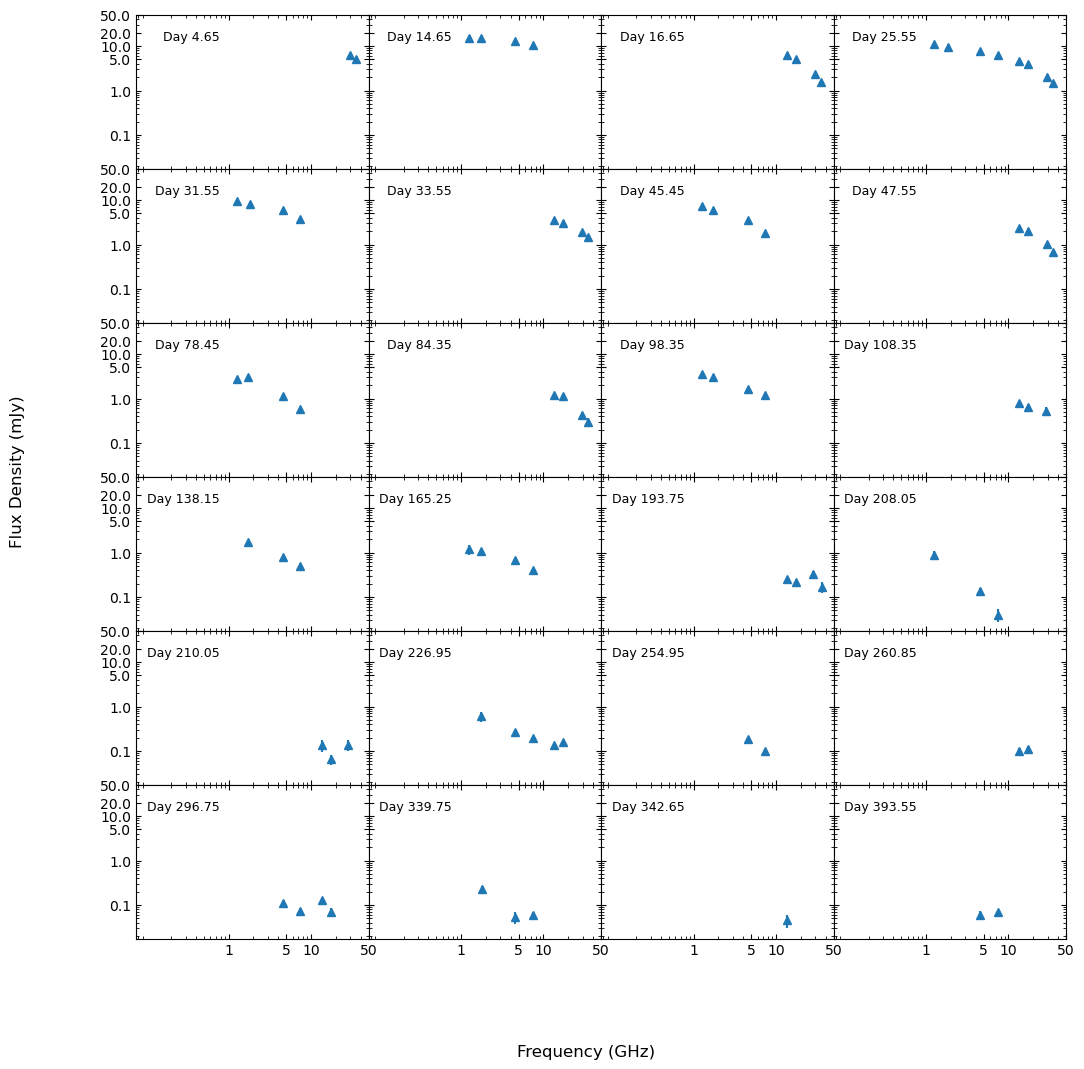

In [7]:
dfs = [df1, df2, df3, df4, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19,
        df21, df22, df23, df25, df26, df27]


#the days by the list so they can all be defined
annotations = ['Day 4.65', 'Day 14.65', 'Day 16.65', 'Day 25.55',  'Day 31.55',
               'Day 33.55', 'Day 45.45', 'Day 47.55','Day 78.45', 'Day 84.35', 
               'Day 98.35', 'Day 108.35','Day 138.15', 'Day 165.25', 'Day 193.75', 
               'Day 208.05','Day 210.05', 'Day 226.95', 'Day 254.95', 'Day 260.85',
               'Day 296.75', 'Day 339.75', 'Day 342.65', 'Day 393.55']

#making the figure (4,4) is the (rows, columns)
fig, ax = plt.subplots(6, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux Density (mJy)'] > 3 * df['Uncertainty (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux Density (mJy)'][mask], yerr=df['Uncertainty (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
        ax[row, col].annotate(label, xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

## Now to find the alpha

In [8]:
def error(err, freq, flux):
    yerr = []
    for i in range(len(freq)):
        if freq[i] < 10:
            pl = np.sqrt(err[i]**2 + (flux[i]*0.05)**2)
            yerr.append(pl)
        else:
            pl =np.sqrt(err[i]**2 + (flux[i]*0.1)**2)
            yerr.append(pl)

    return(yerr)


## Day 4.65 (df1)

In [9]:
#(work for anything with 3+ points)
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold

x1 = df1['Freq (GHz)'][mask].values.tolist()
y1 = df1['Flux Density (mJy)'][mask].values.tolist()
yerr1 = df1['Uncertainty (mJy)'][mask].values.tolist()


In [10]:
yerr1 = error(yerr1, x1, y1)

In [11]:
PL1 =  PowerLaw1D(amplitude = y1[0], x_0= x1[0], alpha= 1.3, bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}
    ) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit1 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model1 = fit1(PL1, x1, y1)

#weight is 1/error^2
y_weight1 = 1/ (np.power(yerr1, 2))  

# fit the data using the uncertainties as weights
fit_model_weights1 = fit1(PL1, x1, y1, weights=y_weight1)

fit_model_weights1

<PowerLaw1D(amplitude=6.42, x_0=29.5, alpha=1.32350604)>

In [12]:
#Error on alpha for only two data points
def two_points(Flux, Freq, Err):
    
    alpha = (np.log10(Flux[0]/Flux[1])) / (np.log10(Freq[0]/Freq[1]))
    
    
    der_s1 = 1 / (Flux[0] * np.log(Freq[0]/Freq[1]))
    der_s2 = -1 / (Flux[1] * np.log(Freq[0]/Freq[1]))
    
    
    err_alph_squared = (der_s1)**2 * (Err[0]**2) + (der_s2)**2 * (Err[1]**2) 
    err_alph = np.sqrt(err_alph_squared)
    
    return(alpha, err_alph)

In [13]:
alpha_err1 = two_points(y1,x1,yerr1)
alpha_err1

(np.float64(-1.3235060413000033), np.float64(0.8280883881734579))

In [14]:
fit1.fit_info

{'nfev': 4,
 'fvec': array([0., 0.]),
 'fjac': array([[-3.88238254,  0.78125085],
        [ 2.60077796,  2.07801415]]),
 'ipvt': array([0, 1], dtype=int32),
 'qtf': array([-4.94575663e-10, -3.95164540e-10]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 3,
 'cov_x': array([[0.17026755, 0.15513434],
        [0.15513434, 0.23158104]])}

In [15]:
"""#taking fvec
fvec1 = np.array()
var1 = np.var(fvec1)

#taking cov_x
cov_x1 = np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag1 = stand(cov_x1*var1) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag1[2]) #Just showing the standard deviation on the slope

"""

"#taking fvec\nfvec1 = np.array()\nvar1 = np.var(fvec1)\n\n#taking cov_x\ncov_x1 = np.array()\n\ndef stand(cov):\n    diag = np.diagonal(cov)\n    sd1 = np.sqrt(diag[0])\n    sd2 = np.sqrt(diag[1])\n    sd3 = np.sqrt(diag[2])\n    return(sd1,sd2,sd3)\n\ndiag1 = stand(cov_x1*var1) \n\n#The last diagonal element corresponds to alpha\n#So here we are calculating the standard deviation on the slope\n\n#print(diag)  #prints standard deviations of all three variances\n\nprint('The error/standard deviation is', diag1[2]) #Just showing the standard deviation on the slope\n\n"

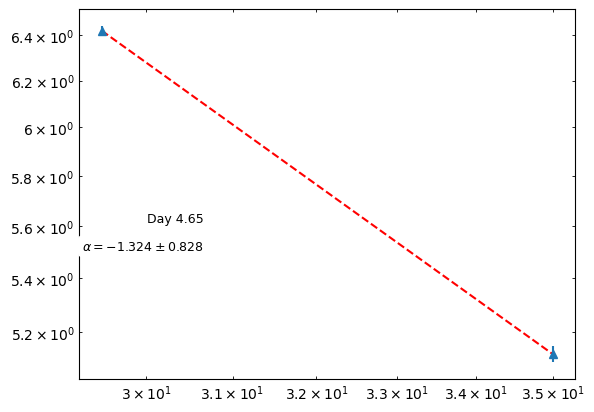

In [16]:

#plotting to check
fig,ax = plt.subplots()
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df1['Freq (GHz)'][mask], df1['Flux Density (mJy)'][mask], yerr=df1['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 4.65', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df1['Freq (GHz)'][mask], fit_model_weights1(df1['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -1.324 \\pm 0.828}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 14.65 (df2)

In [17]:
#(work for anything with 3+ points)
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold

x2 = df2['Freq (GHz)'][mask].values.tolist()
y2 = df2['Flux Density (mJy)'][mask].values.tolist()
yerr2 = df2['Uncertainty (mJy)'][mask].values.tolist()



In [18]:
yerr2 = error(yerr2, x2, y2)

In [19]:
PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit2 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model2 = fit2(PL2, x2, y2)

#weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2, 2))  

# fit the data using the uncertainties as weights
fit_model_weights2 = fit2(PL2, x2, y2, weights=y_weight2)

fit_model_weights2


<PowerLaw1D(amplitude=5.05304483, x_0=310.10007291, alpha=0.20607519)>

In [20]:
fit2.fit_info

{'nfev': 36,
 'fvec': array([ 1.46155898, -0.98665116, -2.80077025,  1.51287493]),
 'fjac': array([[-2.76108436e+02, -1.19340767e+01, -4.00192390e-02,
          5.36329069e-01],
        [-1.19340767e+01,  1.99015092e+00,  6.67368975e-03,
         -9.17810737e-01],
        [-4.00192390e-02,  6.67368975e-03,  1.30104261e-18,
         -0.00000000e+00]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 2.33549131e-04, -1.18501162e-04,  3.63716113e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 6.64319442e+30, -1.98105696e+33, -1.93701813e+14],
        [-1.98105696e+33,  5.90767998e+35,  5.77635245e+16],
        [-1.93701813e+14,  5.77635245e+16,  6.13274022e-03]]),
 'njev': 25,
 'cov_x': array([[ 6.64319442e+30, -1.98105696e+33, -1.93701813e+14],
        [-1.98105696e+33,  5.90767998e+35,  5.77635245e+16],
        [-1.93701813e+14,  5.77635245e+16,  6.13274022e-0

In [21]:
#taking fvec
fvec2 = np.array([ 1.46155898, -0.98665116, -2.80077025,  1.51287493])
var2 = np.var(fvec2)

#taking cov_x
cov_x2 = np.array([[ 6.64319442e+30, -1.98105696e+33, -1.93701813e+14],
        [-1.98105696e+33,  5.90767998e+35,  5.77635245e+16],
        [-1.93701813e+14,  5.77635245e+16,  6.13274022e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag2 = stand(cov_x2*var2) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag2[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.14159883987488817


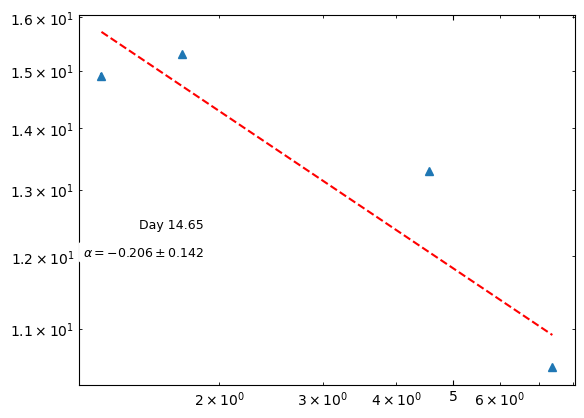

In [22]:

#plotting to check
fig,ax = plt.subplots()
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Freq (GHz)'][mask], df2['Flux Density (mJy)'][mask], yerr=df2['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 14.65', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.206 \\pm 0.142}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 16.65 (df3)

In [23]:
#(work for anything with 3+ points)
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold

x3 = df3['Freq (GHz)'][mask].values.tolist()
y3 = df3['Flux Density (mJy)'][mask].values.tolist()
yerr3 = df3['Uncertainty (mJy)'][mask].values.tolist()



In [24]:
yerr3 = error(yerr3, x3, y3)

In [25]:
PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= .9) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit3= fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model3 = fit3(PL3, x3, y3)

#weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3, 2))  

# fit the data using the uncertainties as weights
fit_model_weights3 = fit3(PL3, x3, y3, weights=y_weight3)

fit_model_weights3


<PowerLaw1D(amplitude=6.89419055, x_0=14.13023426, alpha=1.58786896)>

In [26]:
fit3.fit_info

{'nfev': 17,
 'fvec': array([ 2.34228008, -1.04116658, -4.16447169,  2.08135391]),
 'fjac': array([[-6.44974228e+01,  1.08410428e+01,  8.39884642e+00,
         -9.01491919e-01],
        [ 1.08410428e+01, -3.49861155e+00, -2.71046814e+00,
          5.58212117e-01],
        [ 8.39884642e+00, -2.71046814e+00,  9.15513360e-16,
          2.42535625e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-6.23749975e-05,  2.35026791e-05,  1.68975051e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 7.16090298e+29, -9.24313314e+29, -8.19784928e+13],
        [-9.24313314e+29,  1.19308292e+30,  1.05816002e+14],
        [-8.19784928e+13,  1.05816002e+14,  1.19335018e-02]]),
 'njev': 9,
 'cov_x': array([[ 7.16090298e+29, -9.24313314e+29, -8.19784928e+13],
        [-9.24313314e+29,  1.19308292e+30,  1.05816002e+14],
        [-8.19784928e+13,  1.05816002e+14,  1.19335018e-02

In [27]:
#taking fvec
fvec3 = np.array([ 2.34228008, -1.04116658, -4.16447169,  2.08135391])
var3 = np.var(fvec3)

#taking cov_x
cov_x3 = np.array([[ 7.16090298e+29, -9.24313314e+29, -8.19784928e+13],
        [-9.24313314e+29,  1.19308292e+30,  1.05816002e+14],
        [-8.19784928e+13,  1.05816002e+14,  1.19335018e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag3 = stand(cov_x3*var3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag3[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.2894992531922852


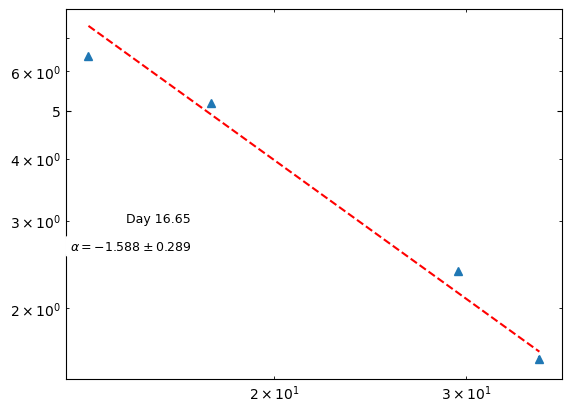

In [28]:

#plotting to check
fig,ax = plt.subplots()
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq (GHz)'][mask], df3['Flux Density (mJy)'][mask], yerr=df3['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 16.65', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -1.588 \\pm 0.289}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 25.55 (df4)

In [29]:
#(work for anything with 3+ points)
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold

x4 = df4['Freq (GHz)'][mask].values.tolist()
y4 = df4['Flux Density (mJy)'][mask].values.tolist()
yerr4 = df4['Uncertainty (mJy)'][mask].values.tolist()



In [30]:
yerr4 = error(yerr4, x4, y4)

In [31]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= 5.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4)

#weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4, 2))  

# fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4)

fit_model_weights4


<PowerLaw1D(amplitude=2.6080375, x_0=18.68820658, alpha=0.62091973)>

In [32]:
fit4.fit_info

{'nfev': 46,
 'fvec': array([ -6.63202897,  -7.95978038,  -1.99862525,  10.8303931 ,
          9.55271158,   5.80925858,  -9.59145297, -15.96701525]),
 'fjac': array([[-1.87642467e+02, -2.26012136e+01, -1.96367650e+00,
         -2.50077559e-01,  6.54208504e-01,  5.79962456e-01,
          3.18542602e-01,  2.41686540e-01],
        [-2.26012136e+01, -4.39415330e+01, -3.81780188e+00,
          8.07704817e-01, -1.50151663e-02,  4.32628658e-02,
          1.68600642e-01,  2.74011551e-01],
        [-1.96367650e+00, -3.81780188e+00, -5.60635146e-16,
         -7.92118034e-01,  2.97044263e-01,  4.95073771e-01,
         -1.98029509e-01,  0.00000000e+00]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([2.68927972e-03, 3.65008344e-04, 1.51985434e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.40168324e+28, -2.76425143e+29,  1.73806112e+11],
        [-2.76425143e+29,  3.

In [33]:
#taking fvec
fvec4 = np.array([ -6.63202897,  -7.95978038,  -1.99862525,  10.8303931 ,
          9.55271158,   5.80925858,  -9.59145297, -15.96701525])
var4 = np.var(fvec4)

#taking cov_x
cov_x4 = np.array([[ 2.40168324e+28, -2.76425143e+29,  1.73806112e+11],
        [-2.76425143e+29,  3.18155445e+30, -2.00044613e+12],
        [ 1.73806112e+11, -2.00044613e+12,  3.71727243e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(cov_x4*var4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag4[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.05574415643681727


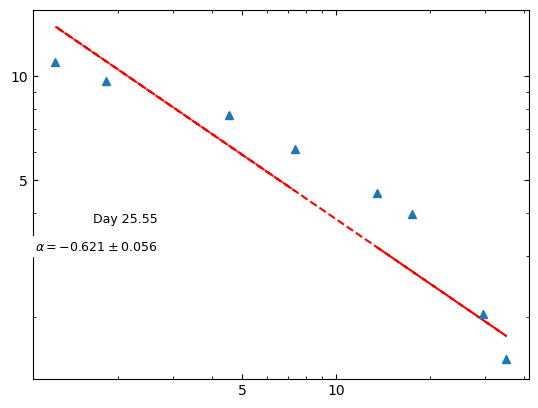

In [34]:

#plotting to check
fig,ax = plt.subplots()
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq (GHz)'][mask], df4['Flux Density (mJy)'][mask], yerr=df4['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 25.55', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.621 \\pm 0.056}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 31.55 (df6)

In [35]:
#(work for anything with 3+ points)
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold

x6 = df6['Freq (GHz)'][mask].values.tolist()
y6 = df6['Flux Density (mJy)'][mask].values.tolist()
yerr6 = df6['Uncertainty (mJy)'][mask].values.tolist()



In [36]:
yerr6 = error(yerr6, x6, y6)

In [37]:
PL6 =  PowerLaw1D(amplitude = y6[0], x_0= x6[0], alpha= -1) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit6 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model6 = fit6(PL6, x6, y6)

#weight is 1/error^2
y_weight6 = 1/ (np.power(yerr6, 2))  

# fit the data using the uncertainties as weights
fit_model_weights6 = fit6(PL6, x6, y6, weights=y_weight6)

fit_model_weights6


<PowerLaw1D(amplitude=2.09182179, x_0=23.77455209, alpha=0.53811442)>

In [38]:
fit6.fit_info

{'nfev': 16,
 'fvec': array([  2.23027788,   1.48541083, -10.13479064,   3.71057296]),
 'fjac': array([[-2.39603753e+02, -6.13668225e+01, -2.91215890e+00,
          5.23435758e-01],
        [-6.13668225e+01,  2.44862621e+01,  1.16199410e+00,
         -9.48237913e-01],
        [-2.91215890e+00,  1.16199410e+00, -2.77555756e-16,
         -8.00000000e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-1.96501027e-04, -5.68792168e-04,  9.13281858e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.92322595e+28, -6.16000343e+29, -1.08758696e+12],
        [-6.16000343e+29,  1.29807421e+31,  2.29183085e+13],
        [-1.08758696e+12,  2.29183085e+13,  1.67286749e-04]]),
 'njev': 10,
 'cov_x': array([[ 2.92322595e+28, -6.16000343e+29, -1.08758696e+12],
        [-6.16000343e+29,  1.29807421e+31,  2.29183085e+13],
        [-1.08758696e+12,  2.29183085e+13,  1.6728674

In [39]:
#taking fvec
fvec6 = np.array([  2.23027788,   1.48541083, -10.13479064,   3.71057296])
var6 = np.var(fvec6)

#taking cov_x
cov_x6 = np.array([[ 2.92322595e+28, -6.16000343e+29, -1.08758696e+12],
        [-6.16000343e+29,  1.29807421e+31,  2.29183085e+13],
        [-1.08758696e+12,  2.29183085e+13,  1.67286749e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag6 = stand(cov_x6*var6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag6[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.07137989595178217


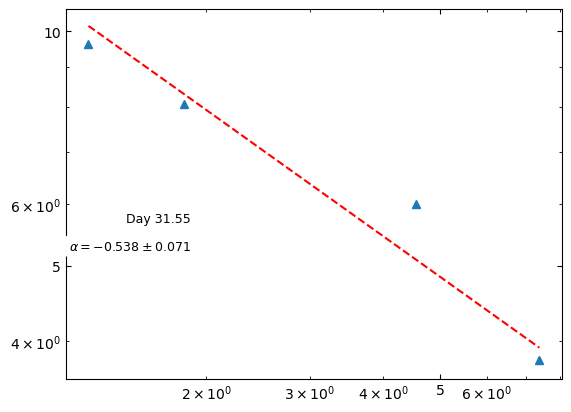

In [40]:

#plotting to check
fig,ax = plt.subplots()
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df6['Freq (GHz)'][mask], df6['Flux Density (mJy)'][mask], yerr=df6['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 31.55', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.538 \\pm 0.071}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 33.55 (df7)

In [41]:
#(work for anything with 3+ points)
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold

x7 = df7['Freq (GHz)'][mask].values.tolist()
y7 = df7['Flux Density (mJy)'][mask].values.tolist()
yerr7 = df7['Uncertainty (mJy)'][mask].values.tolist()



In [42]:
yerr7 = error(yerr7, x7, y7)

In [43]:
PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= 3.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7)

#weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7, 2))  

# fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)

fit_model_weights7


<PowerLaw1D(amplitude=2.84958962, x_0=18.01844945, alpha=0.92377286)>

In [44]:
fit7.fit_info

{'nfev': 16,
 'fvec': array([ 1.70704958, -1.0115338 , -3.25262147,  2.04277955]),
 'fjac': array([[-5.09845410e+01,  2.61577620e+01,  3.81833005e+00,
         -8.69858644e-01],
        [ 2.61577620e+01, -1.96728869e+01, -2.87171262e+00,
          6.04927695e-01],
        [ 3.81833005e+00, -2.87171262e+00,  8.00593208e-16,
         -5.54700196e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-2.95767784e-04,  2.18199231e-04,  3.90665451e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.32446649e+28, -2.27745119e+29, -6.03077258e+12],
        [-2.27745119e+29,  1.56018535e+30,  4.13142688e+13],
        [-6.03077258e+12,  4.13142688e+13,  2.15884114e-03]]),
 'njev': 6,
 'cov_x': array([[ 3.32446649e+28, -2.27745119e+29, -6.03077258e+12],
        [-2.27745119e+29,  1.56018535e+30,  4.13142688e+13],
        [-6.03077258e+12,  4.13142688e+13,  2.15884114e-03

In [45]:
#taking fvec
fvec7 = np.array([ 1.70704958, -1.0115338 , -3.25262147,  2.04277955])
var7 = np.var(fvec7)

#taking cov_x
cov_x7 = np.array([[ 3.32446649e+28, -2.27745119e+29, -6.03077258e+12],
        [-2.27745119e+29,  1.56018535e+30,  4.13142688e+13],
        [-6.03077258e+12,  4.13142688e+13,  2.15884114e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag7 = stand(cov_x7*var7) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag7[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.10025636181737001


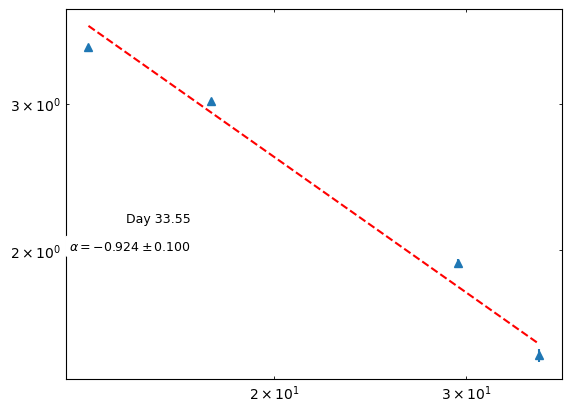

In [46]:

#plotting to check
fig,ax = plt.subplots()
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq (GHz)'][mask], df7['Flux Density (mJy)'][mask], yerr=df7['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 33.55', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.924 \\pm 0.100}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 45.45 (df8)

In [47]:
#(work for anything with 3+ points)
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold

x8 = df8['Freq (GHz)'][mask].values.tolist()
y8 = df8['Flux Density (mJy)'][mask].values.tolist()
yerr8 = df8['Uncertainty (mJy)'][mask].values.tolist()



In [48]:
yerr8 = error(yerr8, x8, y8)

In [49]:
PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= 3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)

#weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8, 2))  

# fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)

fit_model_weights8


<PowerLaw1D(amplitude=9.21426487, x_0=1.10080742, alpha=0.85030084)>

In [50]:
fit8.fit_info

{'nfev': 19,
 'fvec': array([  6.84342684,   2.9740155 , -25.21291616,   6.88366632]),
 'fjac': array([[ 4.35453639e+02, -1.85006224e+02, -2.59934776e+01,
          9.58590210e-01],
        [-1.85006224e+02, -6.10232327e+01, -8.57379820e+00,
         -7.99606356e-01],
        [-2.59934776e+01, -8.57379820e+00,  3.76985706e-15,
          2.35600026e-01]]),
 'ipvt': array([2, 1, 0], dtype=int32),
 'qtf': array([4.53336556e-04, 9.16063732e-05, 2.59641943e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 7.03639535e+28, -9.88617468e+27, -1.96410580e+12],
        [-9.88617468e+27,  1.38901305e+27,  2.75957959e+11],
        [-1.96410580e+12,  2.75957959e+11,  1.08571654e-04]]),
 'njev': 9,
 'cov_x': array([[ 7.03639535e+28, -9.88617468e+27, -1.96410580e+12],
        [-9.88617468e+27,  1.38901305e+27,  2.75957959e+11],
        [-1.96410580e+12,  2.75957959e+11,  1.08571654e-0

In [51]:
#taking fvec
fvec8 = np.array([  6.84342684,   2.9740155 , -25.21291616,   6.88366632])
var8 = np.var(fvec8)

#taking cov_x
cov_x8 = np.array([[ 7.03639535e+28, -9.88617468e+27, -1.96410580e+12],
        [-9.88617468e+27,  1.38901305e+27,  2.75957959e+11],
        [-1.96410580e+12,  2.75957959e+11,  1.08571654e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag8 = stand(cov_x8*var8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag8[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.13985808520020687


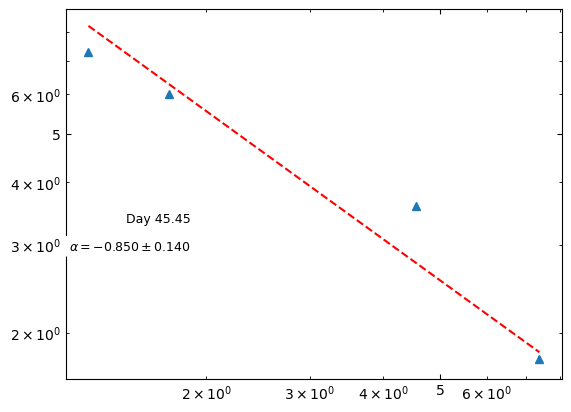

In [52]:

#plotting to check
fig,ax = plt.subplots()
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq (GHz)'][mask], df8['Flux Density (mJy)'][mask], yerr=df8['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 45.45', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq (GHz)'][mask], fit_model_weights8(df8['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.850 \\pm 0.140}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 47.55 (df9)

In [53]:
#(work for anything with 3+ points)
mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold

x9 = df9['Freq (GHz)'][mask].values.tolist()
y9 = df9['Flux Density (mJy)'][mask].values.tolist()
yerr9 = df9['Uncertainty (mJy)'][mask].values.tolist()



In [54]:
yerr9 = error(yerr9, x9, y9)

In [55]:
PL9 =  PowerLaw1D(amplitude = y9[0], x_0= x9[0], alpha= 2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit9 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model9 = fit9(PL9, x9, y9)

#weight is 1/error^2
y_weight9 = 1/ (np.power(yerr9, 2))  

# fit the data using the uncertainties as weights
fit_model_weights9 = fit9(PL9, x9, y9, weights=y_weight9)

fit_model_weights9


<PowerLaw1D(amplitude=3.23422368, x_0=12.02424552, alpha=1.42734707)>

In [56]:
fit9.fit_info

{'nfev': 15,
 'fvec': array([  5.91701461,  -3.71699671, -10.52086172,   5.63791444]),
 'fjac': array([[ 1.66470649e+02, -5.14262795e+01, -1.97436258e+01,
          8.83442652e-01],
        [-5.14262795e+01, -1.60971358e+01, -6.18002758e+00,
         -8.68221419e-01],
        [-1.97436258e+01, -6.18002758e+00, -1.42177919e-15,
          6.24695048e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([2.48952521e-04, 1.29120665e-04, 1.19251125e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 7.29154064e+28, -1.89922972e+29, -1.05665847e+13],
        [-1.89922972e+29,  4.94692917e+29,  2.75228140e+13],
        [-1.05665847e+13,  2.75228140e+13,  1.93564505e-03]]),
 'njev': 7,
 'cov_x': array([[ 7.29154064e+28, -1.89922972e+29, -1.05665847e+13],
        [-1.89922972e+29,  4.94692917e+29,  2.75228140e+13],
        [-1.05665847e+13,  2.75228140e+13,  1.93564505e-0

In [57]:
#taking fvec
fvec9 = np.array([  5.91701461,  -3.71699671, -10.52086172,   5.63791444])
var9 = np.var(fvec9)

#taking cov_x
cov_x9 = np.array([[ 7.29154064e+28, -1.89922972e+29, -1.05665847e+13],
        [-1.89922972e+29,  4.94692917e+29,  2.75228140e+13],
        [-1.05665847e+13,  2.75228140e+13,  1.93564505e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag9 = stand(cov_x9*var9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag9[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.3028237993276833


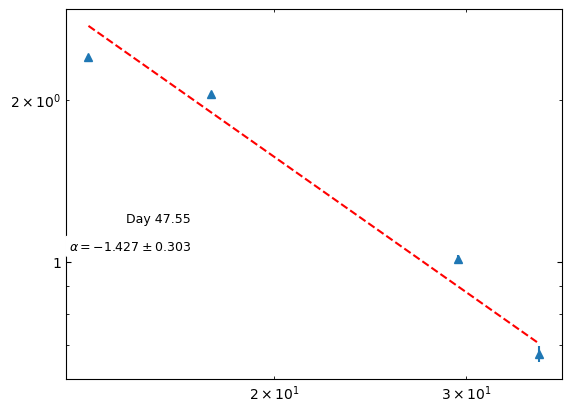

In [58]:

#plotting to check
fig,ax = plt.subplots()
mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq (GHz)'][mask], df9['Flux Density (mJy)'][mask], yerr=df9['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 47.55', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df9['Freq (GHz)'][mask], fit_model_weights9(df9['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -1.427 \\pm 0.303}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 78.45 (df10)

In [59]:
#(work for anything with 3+ points)
mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold

x10 = df10['Freq (GHz)'][mask].values.tolist()
y10 = df10['Flux Density (mJy)'][mask].values.tolist()
yerr10 = df10['Uncertainty (mJy)'][mask].values.tolist()



In [60]:
yerr10 = error(yerr10, x10, y10)

In [61]:
PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= -4) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)

#weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10, 2))  

# fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)

fit_model_weights10


<PowerLaw1D(amplitude=0.01612633, x_0=348.73048697, alpha=0.94272189)>

In [62]:
fit10.fit_info

{'nfev': 83,
 'fvec': array([ 18.84571331, -20.77369042, -22.13294751,  13.23611381]),
 'fjac': array([[-1.81377847e+04, -7.91525204e-01, -1.29678937e+03,
          6.90467231e-01],
        [-7.91525204e-01, -1.24126708e-16, -3.25022534e-07,
          8.94427191e-01],
        [-1.29678937e+03,  1.98420987e+02, -5.17221531e+01,
         -9.98652567e-01]]),
 'ipvt': array([0, 1, 2], dtype=int32),
 'qtf': array([7.39874926e-05, 9.14405978e+00, 3.50643246e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.94268662e+24, -4.45166262e+28, -2.60765231e+10],
        [-4.45166262e+28,  1.02009763e+33,  5.97543020e+14],
        [-2.60765231e+10,  5.97543020e+14,  3.73806466e-04]]),
 'njev': 60,
 'cov_x': array([[ 1.94268662e+24, -4.45166262e+28, -2.60765231e+10],
        [-4.45166262e+28,  1.02009763e+33,  5.97543020e+14],
        [-2.60765231e+10,  5.97543020e+14,  3.73806466e-

In [63]:
#taking fvec
fvec10 = np.array([ 18.84571331, -20.77369042, -22.13294751,  13.23611381])
var10 = np.var(fvec10)

#taking cov_x
cov_x10 = np.array([[ 1.94268662e+24, -4.45166262e+28, -2.60765231e+10],
        [-4.45166262e+28,  1.02009763e+33,  5.97543020e+14],
        [-2.60765231e+10,  5.97543020e+14,  3.73806466e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag10 = stand(cov_x10*var10) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag10[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.3645992242627166


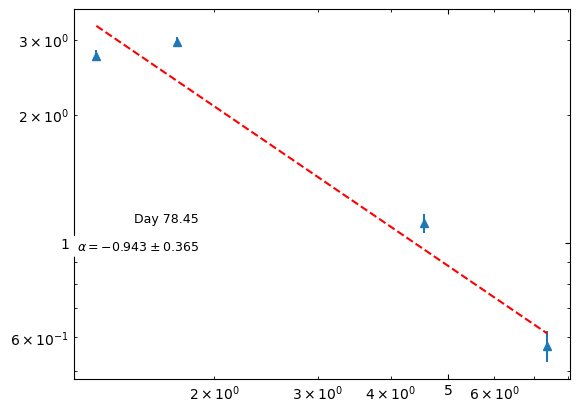

In [64]:

#plotting to check
fig,ax = plt.subplots()
mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq (GHz)'][mask], df10['Flux Density (mJy)'][mask], yerr=df10['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 78.45', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq (GHz)'][mask], fit_model_weights10(df10['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.943 \\pm 0.365}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 84.35  (df11)

In [65]:
#(work for anything with 3+ points)
mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold

x11 = df11['Freq (GHz)'][mask].values.tolist()
y11 = df11['Flux Density (mJy)'][mask].values.tolist()
yerr11 = df11['Uncertainty (mJy)'][mask].values.tolist()



In [66]:
yerr11 = error(yerr11, x11, y11)

In [67]:
PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)

#weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11, 2))  

# fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)

fit_model_weights11


<PowerLaw1D(amplitude=0.05778743, x_0=111.39862766, alpha=1.48636295)>

In [68]:
fit11.fit_info

{'nfev': 31,
 'fvec': array([  8.12140506, -15.17045582,  -2.86476807,   5.99868588]),
 'fjac': array([[-2.40584045e+03, -1.85331715e+00, -2.27627630e+02,
          4.80926619e-01],
        [-1.85331715e+00, -2.48253415e-16, -2.69418042e-08,
          8.94427191e-01],
        [-2.27627630e+02,  2.35206879e+01,  5.06862802e+01,
          4.85794429e-01]]),
 'ipvt': array([0, 1, 2], dtype=int32),
 'qtf': array([ 9.23614744e-04, -5.62780552e+00,  2.61135635e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.17023262e+25, -1.51911018e+28, -2.84090604e+10],
        [-1.51911018e+28,  1.97199746e+31,  3.68785593e+13],
        [-2.84090604e+10,  3.68785593e+13,  3.89241520e-04]]),
 'njev': 18,
 'cov_x': array([[ 1.17023262e+25, -1.51911018e+28, -2.84090604e+10],
        [-1.51911018e+28,  1.97199746e+31,  3.68785593e+13],
        [-2.84090604e+10,  3.68785593e+13,  3.8924152

In [69]:
#taking fvec
fvec11 = np.array([  8.12140506, -15.17045582,  -2.86476807,   5.99868588])
var11 = np.var(fvec11)

#taking cov_x
cov_x11 = np.array([[ 1.17023262e+25, -1.51911018e+28, -2.84090604e+10],
        [-1.51911018e+28,  1.97199746e+31,  3.68785593e+13],
        [-2.84090604e+10,  3.68785593e+13,  3.89241520e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag11 = stand(cov_x11*var11) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag11[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.180944616648134


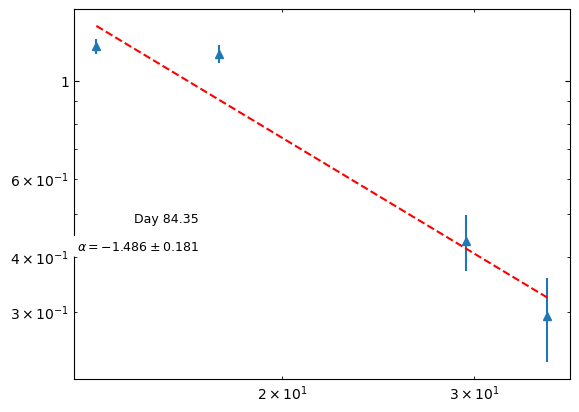

In [70]:

#plotting to check
fig,ax = plt.subplots()
mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq (GHz)'][mask], df11['Flux Density (mJy)'][mask], yerr=df11['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 84.35', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq (GHz)'][mask], fit_model_weights11(df11['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -1.486 \\pm 0.181}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 98.35 (df12)

In [71]:
#(work for anything with 3+ points)
mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold

x12 = df12['Freq (GHz)'][mask].values.tolist()
y12 = df12['Flux Density (mJy)'][mask].values.tolist()
yerr12 = df12['Uncertainty (mJy)'][mask].values.tolist()



In [72]:
yerr12 = error(yerr12, x12, y12)

In [73]:
PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)

#weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12, 2))  

# fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)

fit_model_weights12


<PowerLaw1D(amplitude=0.1191823, x_0=325.3735055, alpha=0.61567361)>

In [74]:
fit12.fit_info

{'nfev': 60,
 'fvec': array([ 3.36776382, -2.32941529, -2.27971055,  1.41346865]),
 'fjac': array([[-3.21819241e+03, -7.26181810e-01, -1.62309352e+03,
          7.22632631e-01],
        [-7.26181810e-01, -2.61845577e-16, -5.37696822e-07,
          8.47998304e-01],
        [-1.62309352e+03,  1.67508908e+02,  1.58437359e+02,
          9.84435601e-01]]),
 'ipvt': array([0, 1, 2], dtype=int32),
 'qtf': array([ 3.57656031e-05,  2.97892324e+00, -3.14960992e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.57274873e+24, -6.96989096e+27, -5.75056922e+09],
        [-6.96989096e+27,  3.08882016e+31,  2.54845797e+13],
        [-5.75056922e+09,  2.54845797e+13,  3.98368333e-05]]),
 'njev': 47,
 'cov_x': array([[ 1.57274873e+24, -6.96989096e+27, -5.75056922e+09],
        [-6.96989096e+27,  3.08882016e+31,  2.54845797e+13],
        [-5.75056922e+09,  2.54845797e+13,  3.98368333e-0

In [75]:
#taking fvec
fvec12 = np.array([ 3.36776382, -2.32941529, -2.27971055,  1.41346865])
var12 = np.var(fvec12)

#taking cov_x
cov_x12 = np.array([[ 1.57274873e+24, -6.96989096e+27, -5.75056922e+09],
        [-6.96989096e+27,  3.08882016e+31,  2.54845797e+13],
        [-5.75056922e+09,  2.54845797e+13,  3.98368333e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag12 = stand(cov_x12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag12[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.015445989308286587


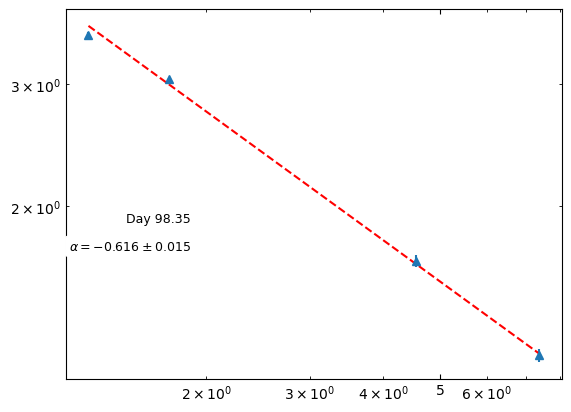

In [76]:

#plotting to check
fig,ax = plt.subplots()
mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq (GHz)'][mask], df12['Flux Density (mJy)'][mask], yerr=df12['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 98.35', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df12['Freq (GHz)'][mask], fit_model_weights12(df12['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.616 \\pm 0.015}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 108.35 (df13)

In [77]:
#(work for anything with 3+ points)
mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold

x13 = df13['Freq (GHz)'][mask].values.tolist()
y13 = df13['Flux Density (mJy)'][mask].values.tolist()
yerr13 = df13['Uncertainty (mJy)'][mask].values.tolist()



In [78]:
yerr13 = error(yerr13, x13, y13)

In [79]:
PL13 =  PowerLaw1D(amplitude = y13[0], x_0= x13[0], alpha= 2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit13 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model13 = fit13(PL13, x13, y13)

#weight is 1/error^2
y_weight13 = 1/ (np.power(yerr13, 2))  

# fit the data using the uncertainties as weights
fit_model_weights13 = fit13(PL13, x13, y13, weights=y_weight13)

fit_model_weights13


<PowerLaw1D(amplitude=0.62099087, x_0=18.83065935, alpha=0.62788187)>

In [80]:
fit13.fit_info

{'nfev': 12,
 'fvec': array([-1.06433519,  1.41090509, -2.34944277]),
 'fjac': array([[-3.02274040e+02, -6.25890678e+00, -3.26815303e+01],
        [-6.25890678e+00, -9.15513360e-16, -6.42034270e-08],
        [-3.26815303e+01,  2.58874486e+01,  1.26456412e+01]]),
 'ipvt': array([0, 1, 2], dtype=int32),
 'qtf': array([ 5.36486581e-05, -1.29040074e+00,  2.64163014e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 8,
 'cov_x': array([[ 2.65521732e+27, -1.28233779e+29, -3.66134360e+12],
        [-1.28233779e+29,  6.19305314e+30,  1.76824669e+14],
        [-3.66134360e+12,  1.76824669e+14,  6.25342997e-03]])}

In [81]:
#taking fvec
fvec13 = np.array([-1.06433519,  1.41090509, -2.34944277])
var13 = np.var(fvec13)

#taking cov_x
cov_x13 = np.array([[ 2.65521732e+27, -1.28233779e+29, -3.66134360e+12],
        [-1.28233779e+29,  6.19305314e+30,  1.76824669e+14],
        [-3.66134360e+12,  1.76824669e+14,  6.25342997e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag13 = stand(cov_x13*var13) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag13[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.12340808756263219


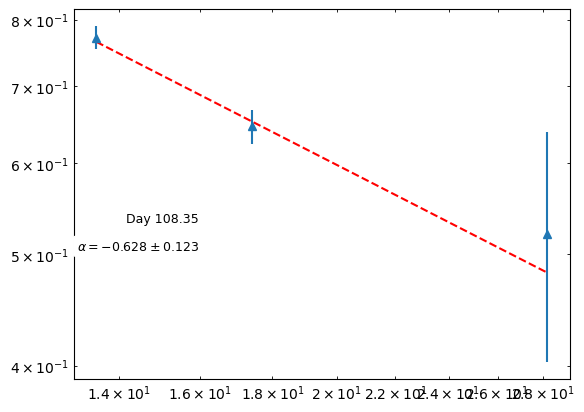

In [82]:

#plotting to check
fig,ax = plt.subplots()
mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df13['Freq (GHz)'][mask], df13['Flux Density (mJy)'][mask], yerr=df13['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 108.35', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df13['Freq (GHz)'][mask], fit_model_weights13(df13['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.628 \\pm 0.123}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 138.15 (df14)

In [83]:
#(work for anything with 3+ points)
mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold

x14 = df14['Freq (GHz)'][mask].values.tolist()
y14 = df14['Flux Density (mJy)'][mask].values.tolist()
yerr14 = df14['Uncertainty (mJy)'][mask].values.tolist()



In [84]:
yerr14 = error(yerr14, x14, y14)

In [85]:
PL14 =  PowerLaw1D(amplitude = y14[0], x_0= x14[0], alpha= 1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit14 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model14 = fit14(PL14, x14, y14)

#weight is 1/error^2
y_weight14 = 1/ (np.power(yerr14, 2))  

# fit the data using the uncertainties as weights
fit_model_weights14 = fit14(PL14, x14, y14, weights=y_weight14)

fit_model_weights14


<PowerLaw1D(amplitude=2.01911235, x_0=1.56677718, alpha=0.88978004)>

In [86]:
fit14.fit_info

{'nfev': 17,
 'fvec': array([ 5.75207419, -3.85129999,  2.61276473]),
 'fjac': array([[ 5.58154189e+02, -2.35496931e+02, -2.05259536e+02],
        [-2.35496931e+02, -5.60603204e+01, -4.88622731e+01],
        [-2.05259536e+02, -4.88622731e+01,  7.10542736e-15]]),
 'ipvt': array([2, 1, 0], dtype=int32),
 'qtf': array([7.81594129e-04, 1.81031566e-04, 7.39901403e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 8,
 'cov_x': array([[ 1.98070406e+28, -1.72638512e+28, -1.54482822e+12],
        [-1.72638512e+28,  1.50472028e+28,  1.34647497e+12],
        [-1.54482822e+12,  1.34647497e+12,  1.80340685e-04]])}

In [87]:
#taking fvec
fvec14 = np.array([ 5.75207419, -3.85129999,  2.61276473])
var14 = np.var(fvec14)

#taking cov_x
cov_x14 = np.array([[ 1.98070406e+28, -1.72638512e+28, -1.54482822e+12],
        [-1.72638512e+28,  1.50472028e+28,  1.34647497e+12],
        [-1.54482822e+12,  1.34647497e+12,  1.80340685e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag14 = stand(cov_x14*var14) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag14[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.0536910575773052


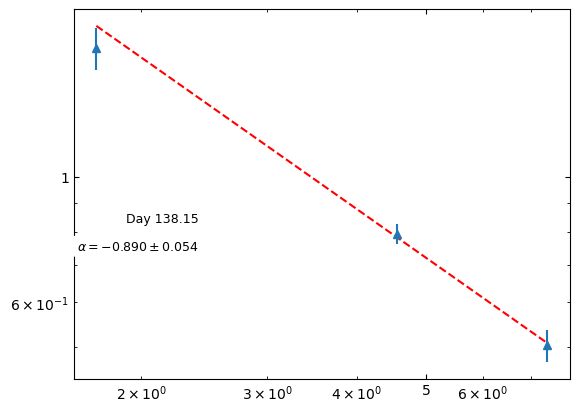

In [88]:

#plotting to check
fig,ax = plt.subplots()
mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df14['Freq (GHz)'][mask], df14['Flux Density (mJy)'][mask], yerr=df14['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 138.15', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df14['Freq (GHz)'][mask], fit_model_weights14(df14['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.890 \\pm 0.054}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 165.25 (df15)

In [89]:
#(work for anything with 3+ points)
mask = df15['Flux Density (mJy)'] > 3 * df15['Uncertainty (mJy)']  # apply detection threshold

x15 = df15['Freq (GHz)'][mask].values.tolist()
y15 = df15['Flux Density (mJy)'][mask].values.tolist()
yerr15 = df15['Uncertainty (mJy)'][mask].values.tolist()



In [90]:
yerr15 = error(yerr15, x15, y15)

In [91]:
PL15 =  PowerLaw1D(amplitude = y15[0], x_0= x15[0], alpha= -3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit15 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model15 = fit15(PL15, x15, y15)

#weight is 1/error^2
y_weight15 = 1/ (np.power(yerr15, 2))  

# fit the data using the uncertainties as weights
fit_model_weights15 = fit15(PL15, x15, y15, weights=y_weight15)

fit_model_weights15


<PowerLaw1D(amplitude=0.01323681, x_0=325.4182838, alpha=0.90451429)>

In [92]:
fit15.fit_info

{'nfev': 99,
 'fvec': array([  8.09359874,  21.14027946, -19.09736894,   5.55025841]),
 'fjac': array([[-5.20686384e+04, -2.67374934e+03, -1.91640124e+00,
          9.12652101e-01],
        [-2.67374934e+03, -1.59608770e+02,  1.21987821e-16,
         -5.49384346e-01],
        [-1.91640124e+00,  1.21987830e-16, -1.85533760e-16,
          9.70451599e-01]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([ 6.65862866e-04, -5.04719729e-07,  1.95070567e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.93527020e+22, -1.06921325e+27, -8.17191966e+08],
        [-1.06921325e+27,  2.90505334e+31,  2.22031128e+13],
        [-8.17191966e+08,  2.22031128e+13,  5.62239120e-05]]),
 'njev': 70,
 'cov_x': array([[ 3.93527020e+22, -1.06921325e+27, -8.17191966e+08],
        [-1.06921325e+27,  2.90505334e+31,  2.22031128e+13],
        [-8.17191966e+08,  2.22031128e+13,  5.6223912

In [93]:
#taking fvec
fvec15 = np.array([  8.09359874,  21.14027946, -19.09736894,   5.55025841])
var15 = np.var(fvec15)

#taking cov_x
cov_x15 = np.array([[ 3.93527020e+22, -1.06921325e+27, -8.17191966e+08],
        [-1.06921325e+27,  2.90505334e+31,  2.22031128e+13],
        [-8.17191966e+08,  2.22031128e+13,  5.62239120e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag15 = stand(cov_x15*var15) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag15[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.10907417628129593


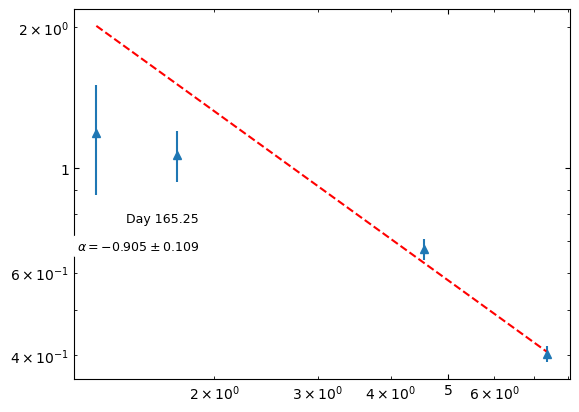

In [94]:

#plotting to check
fig,ax = plt.subplots()
mask = df15['Flux Density (mJy)'] > 3 * df15['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df15['Freq (GHz)'][mask], df15['Flux Density (mJy)'][mask], yerr=df15['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 165.25', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df15['Freq (GHz)'][mask], fit_model_weights15(df15['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.905 \\pm 0.109}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 193.75 (df16)

In [95]:
#(work for anything with 3+ points)
mask = df16['Flux Density (mJy)'] > 3 * df16['Uncertainty (mJy)']  # apply detection threshold

x16 = df16['Freq (GHz)'][mask].values.tolist()
y16 = df16['Flux Density (mJy)'][mask].values.tolist()
yerr16 = df16['Uncertainty (mJy)'][mask].values.tolist()



In [96]:
yerr16 = error(yerr16, x16, y16)

In [97]:
PL16 =  PowerLaw1D(amplitude = y16[0], x_0= x16[0], alpha= 7.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit16 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model16 = fit16(PL16, x16, y16)

#weight is 1/error^2
y_weight16 = 1/ (np.power(yerr16, 2))  

# fit the data using the uncertainties as weights
fit_model_weights16 = fit16(PL16, x16, y16, weights=y_weight16)

fit_model_weights16


<PowerLaw1D(amplitude=0.22017172, x_0=19.69668088, alpha=0.3511043)>

In [98]:
fit16.fit_info

{'nfev': 15,
 'fvec': array([ -6.58227544,  10.67511409, -32.35487041,   4.68744428]),
 'fjac': array([[-1.94617573e+03, -7.69089726e+00, -8.93901869e+01,
          1.71381115e-01],
        [-7.69089726e+00,  8.88178420e-16,  1.33030100e-07,
         -0.00000000e+00],
        [-8.93901869e+01,  4.84081251e+01,  7.30908687e+01,
          9.03080691e-01]]),
 'ipvt': array([0, 1, 2], dtype=int32),
 'qtf': array([ 2.74612792e-03, -1.33883337e+01,  8.86688088e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.84801477e+25, -7.20687980e+27,  4.03168651e+10],
        [-7.20687980e+27,  1.82369548e+30, -1.02021522e+13],
        [ 4.03168651e+10, -1.02021522e+13,  1.87186167e-04]]),
 'njev': 9,
 'cov_x': array([[ 2.84801477e+25, -7.20687980e+27,  4.03168651e+10],
        [-7.20687980e+27,  1.82369548e+30, -1.02021522e+13],
        [ 4.03168651e+10, -1.02021522e+13,  1.87186167

In [99]:
#taking fvec
fvec16 = np.array([ -6.58227544,  10.67511409, -32.35487041,   4.68744428])
var16 = np.var(fvec16)

#taking cov_x
cov_x16 = np.array([[ 2.84801477e+25, -7.20687980e+27,  4.03168651e+10],
        [-7.20687980e+27,  1.82369548e+30, -1.02021522e+13],
        [ 4.03168651e+10, -1.02021522e+13,  1.87186167e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag16 = stand(cov_x16*var16) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag16[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.22555496539013392


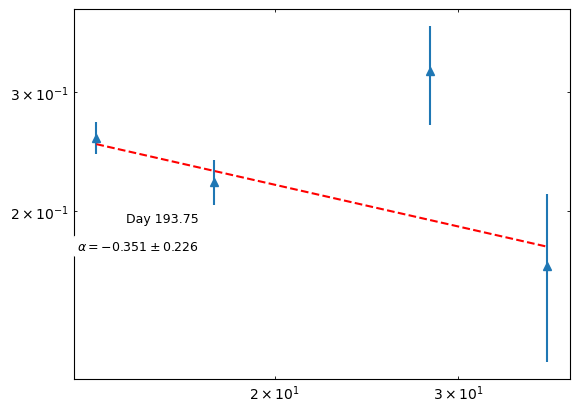

In [100]:

#plotting to check
fig,ax = plt.subplots()
mask = df16['Flux Density (mJy)'] > 3 * df16['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df16['Freq (GHz)'][mask], df16['Flux Density (mJy)'][mask], yerr=df16['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 193.75', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df16['Freq (GHz)'][mask], fit_model_weights16(df16['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.351 \\pm 0.226}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 208.05 (df17)

In [101]:
#(work for anything with 3+ points)
mask = df17['Flux Density (mJy)'] > 3 * df17['Uncertainty (mJy)']  # apply detection threshold

x17 = df17['Freq (GHz)'][mask].values.tolist()
y17 = df17['Flux Density (mJy)'][mask].values.tolist()
yerr17 = df17['Uncertainty (mJy)'][mask].values.tolist()



In [102]:
yerr17 = error(yerr17, x17, y17)

In [103]:
PL17 =  PowerLaw1D(amplitude = y17[0], x_0= x17[0], alpha= 4) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit17 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model17 = fit17(PL17, x17, y17)

#weight is 1/error^2
y_weight17 = 1/ (np.power(yerr17, 2))  

# fit the data using the uncertainties as weights
fit_model_weights17 = fit17(PL17, x17, y17, weights=y_weight17)

fit_model_weights17


<PowerLaw1D(amplitude=1.36471933, x_0=1.50665293, alpha=2.16852106)>

In [104]:
fit17.fit_info

{'nfev': 16,
 'fvec': array([ 34.36451329, -28.11181054,  21.82386337]),
 'fjac': array([[-5.45840473e+02,  4.89746862e+02, -2.76945185e+02],
        [ 4.89746862e+02,  1.28169317e+02, -1.24427577e-13],
        [-2.76945185e+02, -2.84013454e-14, -1.07570697e-15]]),
 'ipvt': array([1, 2, 0], dtype=int32),
 'qtf': array([ 3.50322386e-04,  2.37920538e-03, -4.94719585e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 11,
 'cov_x': array([[ 8.64195568e+29, -4.38470237e+29,  1.91499162e+14],
        [-4.38470237e+29,  2.22468334e+29, -9.71616681e+13],
        [ 1.91499162e+14, -9.71616681e+13,  4.24956312e-02]])}

In [105]:
#taking fvec
fvec17 = np.array([ 34.36451329, -28.11181054,  21.82386337])
var17 = np.var(fvec17)

#taking cov_x
cov_x17 = np.array([[ 8.64195568e+29, -4.38470237e+29,  1.91499162e+14],
        [-4.38470237e+29,  2.22468334e+29, -9.71616681e+13],
        [ 1.91499162e+14, -9.71616681e+13,  4.24956312e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag17 = stand(cov_x17*var17) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag17[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 5.562991913122093


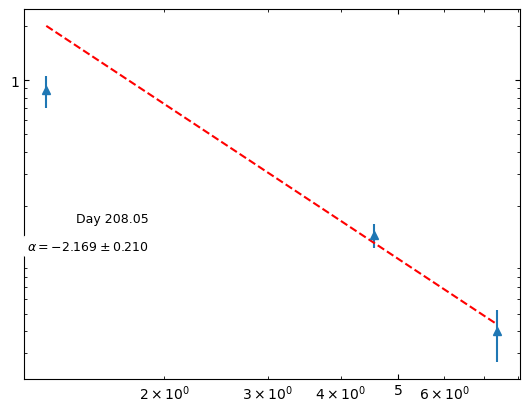

In [106]:

#plotting to check
fig,ax = plt.subplots()
mask = df17['Flux Density (mJy)'] > 3 * df17['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df17['Freq (GHz)'][mask], df17['Flux Density (mJy)'][mask], yerr=df17['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 208.05', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df17['Freq (GHz)'][mask], fit_model_weights17(df17['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -2.169 \\pm 0.210}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 210.05 (df18)

In [167]:
E18 = (
[56952.9,	13.5,	0.136,	0.041],#13B-057	Justin	10/22/2014	C	JMFIT, dowidth -1

#repeated to put more weight for a better fit
[56952.9,	13.5,	0.136,	0.041],#13B-057	Justin	10/22/2014	C	JMFIT, dowidth -1
    
[56952.9,	17.5,	0.0645,	0.0163],#	 	 	 	JMFIT, dowidth -1 NOTE: reported flux maybe too low, uniform weighting has ~0.18 mJy, natural is 0.06
[56952.9,	28.2,	0.138,	0.0396],#	 	 	 	JMFIT, dowidth -1
[56952.9,	36.5,	0.133,	0.0517],#	 	 	 	JMFIT, dowidth -1
)

df18 =  pd.DataFrame(E18, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [168]:
#(work for anything with 3+ points)
mask = df18['Flux Density (mJy)'] > 3 * df18['Uncertainty (mJy)']  # apply detection threshold

x18 = df18['Freq (GHz)'][mask].values.tolist()
y18 = df18['Flux Density (mJy)'][mask].values.tolist()
yerr18 = df18['Uncertainty (mJy)'][mask].values.tolist()



In [169]:
yerr18 = error(yerr18, x18, y18)

In [171]:
PL18 =  PowerLaw1D(amplitude = y18[0], x_0= x18[0], alpha= -2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit18 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model18 = fit18(PL18, x18, y18)

#weight is 1/error^2
y_weight18 = 1/ (np.power(yerr18, 2))  

# fit the data using the uncertainties as weights
fit_model_weights18 = fit18(PL18, x18, y18, weights=y_weight18)

fit_model_weights18


<PowerLaw1D(amplitude=0.53181136, x_0=1468.00758238, alpha=-0.45782317)>

In [172]:
fit18.fit_info

{'nfev': 91,
 'fvec': array([-39.57687795, -39.57687795,  17.87182824, -28.95539153]),
 'fjac': array([[-1.05383798e+03, -4.44310138e+02,  7.33442719e-02,
          1.86252315e-01],
        [-4.44310138e+02,  1.11696597e+01, -1.84382595e-03,
         -9.31912284e-01],
        [ 7.33442719e-02, -1.84382595e-03, -3.09757528e-18,
          7.00032815e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-1.76024180e-03,  5.55878570e-03, -4.17973591e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.83998611e+27,  1.72042695e+31, -1.03120945e+12],
        [ 1.72042695e+31,  1.04221246e+35, -6.24693384e+15],
        [-1.03120945e+12, -6.24693384e+15,  1.80010675e-03]]),
 'njev': 65,
 'cov_x': array([[ 2.83998611e+27,  1.72042695e+31, -1.03120945e+12],
        [ 1.72042695e+31,  1.04221246e+35, -6.24693384e+15],
        [-1.03120945e+12, -6.24693384e+15,  1.8001067

In [173]:
#taking fvec
fvec18 = np.array([-39.57687795, -39.57687795,  17.87182824, -28.95539153])
var18 = np.var(fvec18)

#taking cov_x
cov_x18 = np.array([[ 2.83998611e+27,  1.72042695e+31, -1.03120945e+12],
        [ 1.72042695e+31,  1.04221246e+35, -6.24693384e+15],
        [-1.03120945e+12, -6.24693384e+15,  1.80010675e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag18 = stand(cov_x18*var18) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag18[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 1.0073291868990217


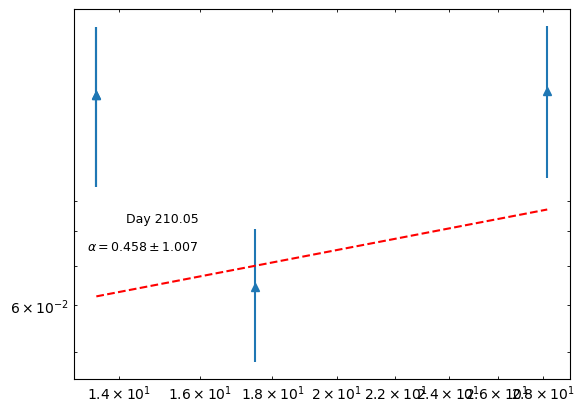

In [174]:

#plotting to check
fig,ax = plt.subplots()
mask = df18['Flux Density (mJy)'] > 3 * df18['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df18['Freq (GHz)'][mask], df18['Flux Density (mJy)'][mask], yerr=df18['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 210.05', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df18['Freq (GHz)'][mask], fit_model_weights18(df18['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.458 \\pm 1.007}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 226.95 (df19)

In [113]:
#(work for anything with 3+ points)
mask = df19['Flux Density (mJy)'] > 3 * df19['Uncertainty (mJy)']  # apply detection threshold

x19 = df19['Freq (GHz)'][mask].values.tolist()
y19 = df19['Flux Density (mJy)'][mask].values.tolist()
yerr19 = df19['Uncertainty (mJy)'][mask].values.tolist()



In [114]:
yerr19 = error(yerr19, x19, y19)

In [115]:
PL19 =  PowerLaw1D(amplitude = y19[0], x_0= x19[0], alpha= 2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit19 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model19 = fit19(PL19, x19, y19)

#weight is 1/error^2
y_weight19 = 1/ (np.power(yerr19, 2))  

# fit the data using the uncertainties as weights
fit_model_weights19 = fit19(PL19, x19, y19, weights=y_weight19)

fit_model_weights19


<PowerLaw1D(amplitude=0.14929567, x_0=12.75055623, alpha=0.54502099)>

In [116]:
fit19.fit_info

{'nfev': 16,
 'fvec': array([ 26.46950847, -58.59433779,  -7.07335644, -21.0594385 ,
         14.43165897]),
 'fjac': array([[-7.66882769e+03, -6.08334405e+02, -4.88841959e+01,
          4.29742427e-01,  8.10535613e-01],
        [-6.08334405e+02,  3.90164355e+02, -7.09165799e-16,
         -8.19650039e-01, -3.96056358e-01],
        [-4.88841959e+01, -2.80532397e-15, -6.52913327e-15,
          2.50444011e-01, -9.67250029e-01]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([ 6.57405644e-03,  1.18455905e-04, -1.53599003e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 9.53164644e+23, -1.49530033e+26, -1.07513713e+09],
        [-1.49530033e+26,  2.34578893e+28,  1.68664765e+11],
        [-1.07513713e+09,  1.68664765e+11,  7.78180201e-06]]),
 'njev': 10,
 'cov_x': array([[ 9.53164644e+23, -1.49530033e+26, -1.07513713e+09],
        [-1.49530033e+26,  2.34578893e+28

In [117]:
#taking fvec
fvec19 = np.array([ 26.46950847, -58.59433779,  -7.07335644, -21.0594385 ,
         14.43165897])
var19 = np.var(fvec19)

#taking cov_x
cov_x19 = np.array([[ 9.53164644e+23, -1.49530033e+26, -1.07513713e+09],
        [-1.49530033e+26,  2.34578893e+28,  1.68664765e+11],
        [-1.07513713e+09,  1.68664765e+11,  7.78180201e-06]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag19 = stand(cov_x19*var19) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag19[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.08290036994745466


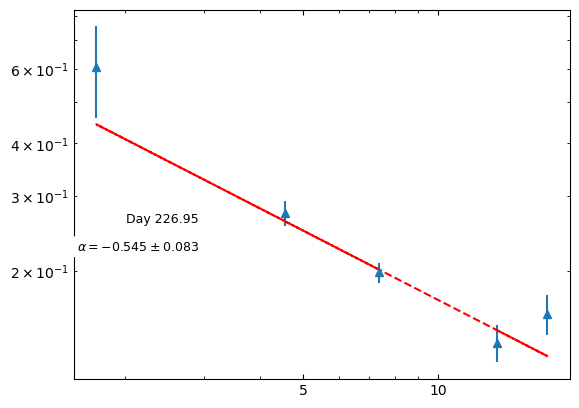

In [118]:

#plotting to check
fig,ax = plt.subplots()
mask = df19['Flux Density (mJy)'] > 3 * df19['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df19['Freq (GHz)'][mask], df19['Flux Density (mJy)'][mask], yerr=df19['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 226.95', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df19['Freq (GHz)'][mask], fit_model_weights19(df19['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.545 \\pm 0.083}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 254.95 (df21)

In [119]:
#(work for anything with 3+ points)
mask = df21['Flux Density (mJy)'] > 3 * df21['Uncertainty (mJy)']  # apply detection threshold

x21 = df21['Freq (GHz)'][mask].values.tolist()
y21 = df21['Flux Density (mJy)'][mask].values.tolist()
yerr21 = df21['Uncertainty (mJy)'][mask].values.tolist()



In [120]:
yerr21 = error(yerr21, x21, y21)

In [121]:
PL21 =  PowerLaw1D(amplitude = y21[0], x_0= x21[0], alpha= -1.5, bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit21 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model21 = fit21(PL21, x21, y21)

#weight is 1/error^2
y_weight21 = 1/ (np.power(yerr21, 2))  

# fit the data using the uncertainties as weights
fit_model_weights21 = fit21(PL21, x21, y21, weights=y_weight21)

fit_model_weights21


<PowerLaw1D(amplitude=0.184, x_0=4.55, alpha=1.2983236)>

In [122]:
fit21.fit_info

{'nfev': 7,
 'fvec': array([0., 0.]),
 'fjac': array([[-3.06047504e+03,  9.03034478e-01],
        [ 2.22097308e+02,  1.05650355e+02]]),
 'ipvt': array([0, 1], dtype=int32),
 'qtf': array([-9.26979750e-07, -4.40958696e-07]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 6,
 'cov_x': array([[5.78573210e-07, 6.50148452e-06],
        [6.50148452e-06, 8.95896996e-05]])}

In [123]:
"""#taking fvec
fvec21 = np.array()
var21 = np.var(fvec21)

#taking cov_x
cov_x21 = np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag21 = stand(cov_x21*var21) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag21[2]) #Just showing the standard deviation on the slope

"""

"#taking fvec\nfvec21 = np.array()\nvar21 = np.var(fvec21)\n\n#taking cov_x\ncov_x21 = np.array()\n\ndef stand(cov):\n    diag = np.diagonal(cov)\n    sd1 = np.sqrt(diag[0])\n    sd2 = np.sqrt(diag[1])\n    sd3 = np.sqrt(diag[2])\n    return(sd1,sd2,sd3)\n\ndiag21 = stand(cov_x21*var21) \n\n#The last diagonal element corresponds to alpha\n#So here we are calculating the standard deviation on the slope\n\n#print(diag)  #prints standard deviations of all three variances\n\nprint('The error/standard deviation is', diag21[2]) #Just showing the standard deviation on the slope\n\n"

In [124]:
alpha_err21 = two_points(y21,x21,yerr21)
alpha_err21

(np.float64(-1.2983235994595588), np.float64(0.4262126960824062))

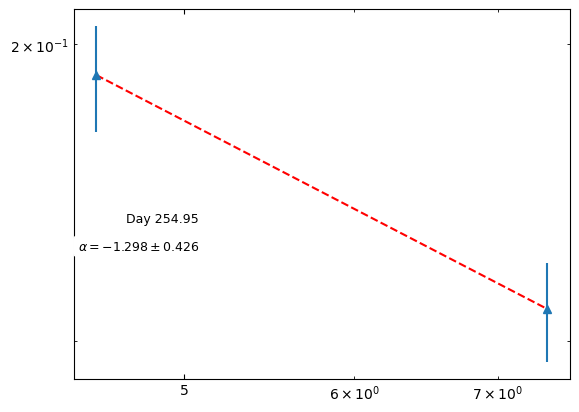

In [125]:

#plotting to check
fig,ax = plt.subplots()
mask = df21['Flux Density (mJy)'] > 3 * df21['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df21['Freq (GHz)'][mask], df21['Flux Density (mJy)'][mask], yerr=df21['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 254.95', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df21['Freq (GHz)'][mask], fit_model_weights21(df21['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -1.298 \\pm 0.426}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 260.85 (df22)

In [126]:
#(work for anything with 3+ points)
mask = df22['Flux Density (mJy)'] > 3 * df22['Uncertainty (mJy)']  # apply detection threshold

x22 = df22['Freq (GHz)'][mask].values.tolist()
y22 = df22['Flux Density (mJy)'][mask].values.tolist()
yerr22 = df22['Uncertainty (mJy)'][mask].values.tolist()



In [127]:
yerr22 = error(yerr22, x22, y22)

In [128]:
PL22 =  PowerLaw1D(amplitude = y22[0], x_0= x22[0], alpha= -2.5,  bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit22 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model22 = fit22(PL22, x22, y22)

#weight is 1/error^2
y_weight22 = 1/ (np.power(yerr22, 2))  

# fit the data using the uncertainties as weights
fit_model_weights22 = fit22(PL22, x22, y22, weights=y_weight22)

fit_model_weights22


<PowerLaw1D(amplitude=0.1, x_0=13.5, alpha=-0.33207699)>

In [129]:
fit22.fit_info

{'nfev': 6,
 'fvec': array([0.00000000e+00, 3.34686791e-14]),
 'fjac': array([[-4.06869455e+03,  6.46085124e-01],
        [ 4.40748323e+01,  5.20686696e+01]]),
 'ipvt': array([0, 1], dtype=int32),
 'qtf': array([-1.04176720e-07, -1.23071217e-07]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[1.03690440e-07, 3.99560566e-06],
        [3.99560566e-06, 3.68847665e-04]])}

In [130]:
"""#taking fvec
fvec22 = np.array()
var22 = np.var(fvec22)

#taking cov_x
cov_x22 = np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag22 = stand(cov_x22*var22) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag22[2]) #Just showing the standard deviation on the slope

"""

"#taking fvec\nfvec22 = np.array()\nvar22 = np.var(fvec22)\n\n#taking cov_x\ncov_x22 = np.array()\n\ndef stand(cov):\n    diag = np.diagonal(cov)\n    sd1 = np.sqrt(diag[0])\n    sd2 = np.sqrt(diag[1])\n    sd3 = np.sqrt(diag[2])\n    return(sd1,sd2,sd3)\n\ndiag22 = stand(cov_x22*var22) \n\n#The last diagonal element corresponds to alpha\n#So here we are calculating the standard deviation on the slope\n\n#print(diag)  #prints standard deviations of all three variances\n\nprint('The error/standard deviation is', diag22[2]) #Just showing the standard deviation on the slope\n\n"

In [131]:
alpha_err22 = two_points(y22,x22,yerr22)
alpha_err22

(np.float64(0.3320769883548448), np.float64(0.9981808696519302))

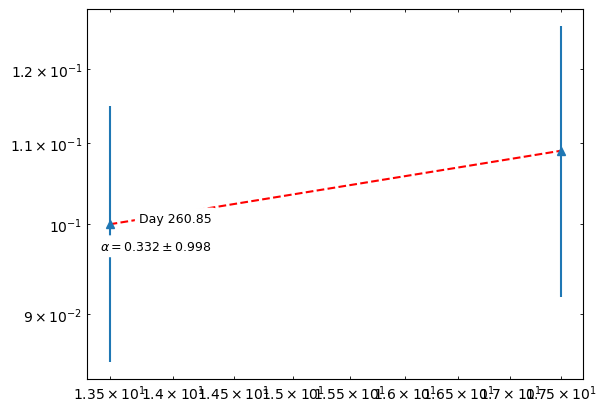

In [132]:

#plotting to check
fig,ax = plt.subplots()
mask = df22['Flux Density (mJy)'] > 3 * df22['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df22['Freq (GHz)'][mask], df22['Flux Density (mJy)'][mask], yerr=df22['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 260.85', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df22['Freq (GHz)'][mask], fit_model_weights22(df22['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.332 \\pm 0.998}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 296.75 (df23)

In [133]:
#(work for anything with 3+ points)
mask = df23['Flux Density (mJy)'] > 3 * df23['Uncertainty (mJy)']  # apply detection threshold

x23 = df23['Freq (GHz)'][mask].values.tolist()
y23 = df23['Flux Density (mJy)'][mask].values.tolist()
yerr23 = df23['Uncertainty (mJy)'][mask].values.tolist()



In [134]:
yerr23 = error(yerr23, x23, y23)

In [135]:
PL23 =  PowerLaw1D(amplitude = y23[0], x_0= x23[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit23 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model23 = fit23(PL23, x23, y23)

#weight is 1/error^2
y_weight23 = 1/ (np.power(yerr23, 2))  

# fit the data using the uncertainties as weights
fit_model_weights23 = fit23(PL23, x23, y23, weights=y_weight23)

fit_model_weights23


<PowerLaw1D(amplitude=0.07967249, x_0=11.74816487, alpha=0.098583)>

In [136]:
fit23.fit_info

{'nfev': 17,
 'fvec': array([-158.0266172 ,   23.41767341, -100.76808896,  102.83127078]),
 'fjac': array([[-1.11292285e+04, -3.95078113e+02, -7.44055690e+00,
          8.05477669e-01],
        [-3.95078113e+02,  3.20167209e+02,  6.14306636e-16,
         -3.31178702e-01],
        [-7.44055690e+00,  2.94145776e-16,  8.38056781e-16,
         -9.84386711e-01]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([ 3.44766965e-03, -1.93252017e-03,  2.14090848e+02]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 6.36405436e+23, -9.51904755e+26,  8.74539163e+08],
        [-9.51904755e+26,  1.42381352e+30, -1.30809377e+12],
        [ 8.74539163e+08, -1.30809377e+12,  1.09572065e-05]]),
 'njev': 10,
 'cov_x': array([[ 6.36405436e+23, -9.51904755e+26,  8.74539163e+08],
        [-9.51904755e+26,  1.42381352e+30, -1.30809377e+12],
        [ 8.74539163e+08, -1.30809377e+12,  1.095

In [137]:
#taking fvec
fvec23 = np.array([-158.0266172 ,   23.41767341, -100.76808896,  102.83127078])
var23 = np.var(fvec23)

#taking cov_x
cov_x23 = np.array([[ 6.36405436e+23, -9.51904755e+26,  8.74539163e+08],
        [-9.51904755e+26,  1.42381352e+30, -1.30809377e+12],
        [ 8.74539163e+08, -1.30809377e+12,  1.09572065e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag23 = stand(cov_x23*var23) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag23[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.3386140100796706


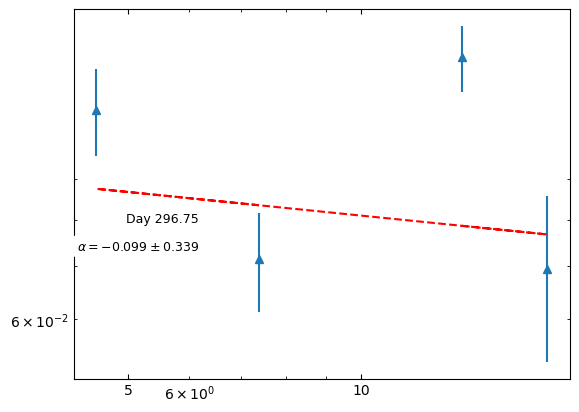

In [138]:

#plotting to check
fig,ax = plt.subplots()
mask = df23['Flux Density (mJy)'] > 3 * df23['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df23['Freq (GHz)'][mask], df23['Flux Density (mJy)'][mask], yerr=df23['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 296.75', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df23['Freq (GHz)'][mask], fit_model_weights23(df23['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.099 \\pm 0.339}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 339.75 (df25)

In [139]:
E25 = (
[57082.6,	1.26,	0.192,	0.116],#13B-057	Justin	3/1/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
[57082.6,	1.8,	0.228,	0.045],#	 	 	JMFIT, dowidth -1

[57082.6,	1.8,	0.228,	0.045],#	 	 	JMFIT, dowidth -1 ## Putting this in in order for it to influence the fit

[57082.6,	4.55,	0.0528,	0.0157],#	 	 	 	JMFIT, dowidth -1
[57082.6,	7.38,	0.0586,	0.0116],#	 	 	 	JMFIT, dowidth -1
)


df25 =  pd.DataFrame(E25, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [140]:
#(work for anything with 3+ points)
mask = df25['Flux Density (mJy)'] > 3 * df25['Uncertainty (mJy)']  # apply detection threshold

x25 = df25['Freq (GHz)'][mask].values.tolist()
y25 = df25['Flux Density (mJy)'][mask].values.tolist()
yerr25 = df25['Uncertainty (mJy)'][mask].values.tolist()



In [141]:
yerr25 = error(yerr25, x25, y25)

In [147]:
PL25 =  PowerLaw1D(amplitude = y25[0], x_0= x25[0], alpha= 5.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit25 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model25 = fit25(PL25, x25, y25)

#weight is 1/error^2
y_weight25 = 1/ (np.power(yerr25, 2))  

# fit the data using the uncertainties as weights
fit_model_weights25 = fit25(PL25, x25, y25, weights=y_weight25)

fit_model_weights25


<PowerLaw1D(amplitude=0.16747536, x_0=0.63296281, alpha=0.4563025)>

In [148]:
fit25.fit_info

{'nfev': 37,
 'fvec': array([-57.56339531, -57.56339531,  60.31511649, -27.91705299]),
 'fjac': array([[-2.81316686e+03,  1.07086412e+03, -3.40471255e+02,
          8.08996958e-01],
        [ 1.07086412e+03, -1.35687034e+02,  2.11038309e-11,
         -8.43857931e-01],
        [-3.40471255e+02,  1.03237247e-14,  2.64804508e-14,
          2.35846703e-01]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([ 1.06493252e-02, -5.58497837e-03, -9.66695639e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.08890731e+25, -1.72597385e+26, -1.31320424e+10],
        [-1.72597385e+26,  1.42609761e+27,  1.08504392e+11],
        [-1.31320424e+10,  1.08504392e+11,  6.25709777e-05]]),
 'njev': 21,
 'cov_x': array([[ 2.08890731e+25, -1.72597385e+26, -1.31320424e+10],
        [-1.72597385e+26,  1.42609761e+27,  1.08504392e+11],
        [-1.31320424e+10,  1.08504392e+11,  6.2570977

In [149]:
#taking fvec
fvec25 = np.array([-57.56339531, -57.56339531,  60.31511649, -27.91705299])
var25 = np.var(fvec25)

#taking cov_x
cov_x25 = np.array([[ 2.08890731e+25, -1.72597385e+26, -1.31320424e+10],
        [-1.72597385e+26,  1.42609761e+27,  1.08504392e+11],
        [-1.31320424e+10,  1.08504392e+11,  6.25709777e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag25 = stand(cov_x25*var25) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag25[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.3820984998744578


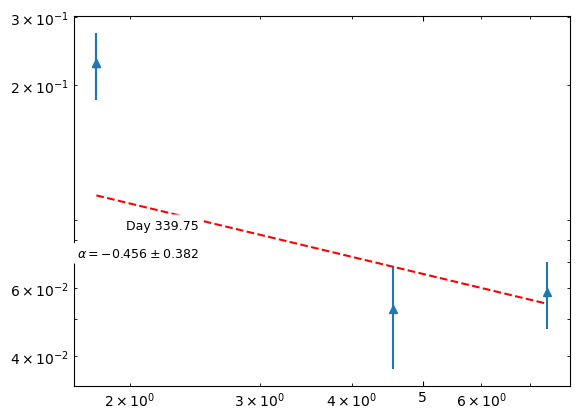

In [150]:

#plotting to check
fig,ax = plt.subplots()
mask = df25['Flux Density (mJy)'] > 3 * df25['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df25['Freq (GHz)'][mask], df25['Flux Density (mJy)'][mask], yerr=df25['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 339.75', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df25['Freq (GHz)'][mask], fit_model_weights25(df25['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.456 \\pm 0.382}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 342.65 (df26)

In [152]:
#(work for anything with 3+ points)
mask = df26['Flux Density (mJy)'] > 3 * df26['Uncertainty (mJy)']  # apply detection threshold

x26 = df26['Freq (GHz)'][mask].values.tolist()
y26 = df26['Flux Density (mJy)'][mask].values.tolist()
yerr26 = df26['Uncertainty (mJy)'][mask].values.tolist()



In [153]:
## Only one point
yerr26 = error(yerr26, x26, y26)

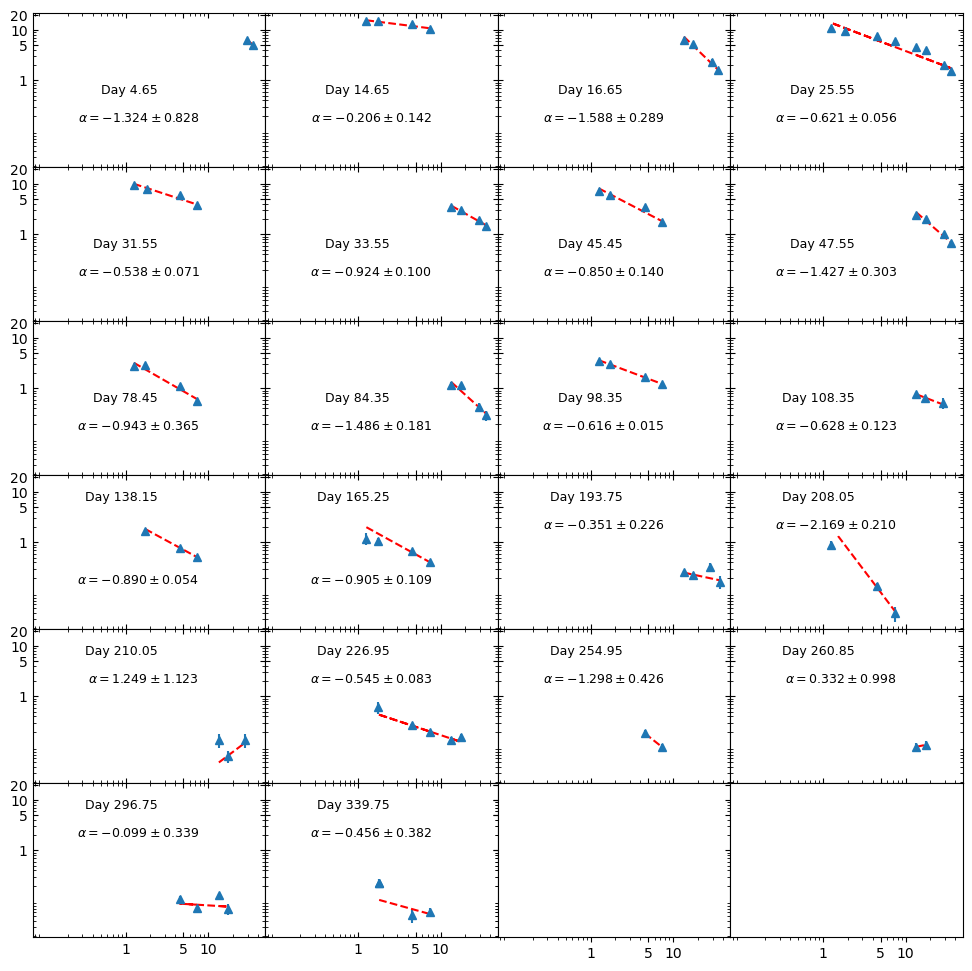

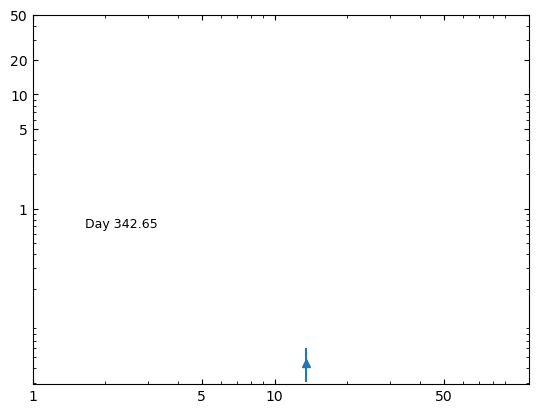

In [154]:

#plotting to check
fig,ax = plt.subplots()
mask = df26['Flux Density (mJy)'] > 3 * df26['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df26['Freq (GHz)'][mask], df26['Flux Density (mJy)'][mask], yerr=yerr26, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 342.65', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    
plt.show();


## Day 393.55 (df27)

In [155]:
#(work for anything with 3+ points)
mask = df27['Flux Density (mJy)'] > 3 * df27['Uncertainty (mJy)']  # apply detection threshold

x27 = df27['Freq (GHz)'][mask].values.tolist()
y27 = df27['Flux Density (mJy)'][mask].values.tolist()
yerr27 = df27['Uncertainty (mJy)'][mask].values.tolist()



In [156]:
yerr27 = error(yerr27, x27, y27)

In [157]:
PL27 =  PowerLaw1D(amplitude = y27[0], x_0= x27[0], alpha= -1.5,  bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                   
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit27 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model27 = fit27(PL27, x27, y27)

#weight is 1/error^2
y_weight27 = 1/ (np.power(yerr27, 2))  

# fit the data using the uncertainties as weights
fit_model_weights27 = fit27(PL27, x27, y27, weights=y_weight27)

fit_model_weights27


<PowerLaw1D(amplitude=0.0609, x_0=4.55, alpha=-0.21580809)>

In [158]:
fit27.fit_info

{'nfev': 6,
 'fvec': array([0., 0.]),
 'fjac': array([[-1.12602708e+04,  8.53753436e-01],
        [ 2.41745848e+02,  1.47433229e+02]]),
 'ipvt': array([0, 1], dtype=int32),
 'qtf': array([-1.24958687e-06, -7.62083935e-07]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[2.90914044e-08, 9.87687210e-07],
        [9.87687210e-07, 4.60054458e-05]])}

In [159]:
"""#taking fvec
fvec27 = np.array()
var27 = np.var(fvec27)

#taking cov_x
cov_x27 = np.array()

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag27 = stand(cov_x27*var27) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag27[2]) #Just showing the standard deviation on the slope

"""

"#taking fvec\nfvec27 = np.array()\nvar27 = np.var(fvec27)\n\n#taking cov_x\ncov_x27 = np.array()\n\ndef stand(cov):\n    diag = np.diagonal(cov)\n    sd1 = np.sqrt(diag[0])\n    sd2 = np.sqrt(diag[1])\n    sd3 = np.sqrt(diag[2])\n    return(sd1,sd2,sd3)\n\ndiag27 = stand(cov_x27*var27) \n\n#The last diagonal element corresponds to alpha\n#So here we are calculating the standard deviation on the slope\n\n#print(diag)  #prints standard deviations of all three variances\n\nprint('The error/standard deviation is', diag27[2]) #Just showing the standard deviation on the slope\n\n"

In [160]:
alpha_err27 = two_points(y27,x27,yerr27)
alpha_err27

(np.float64(0.21580809267649745), np.float64(0.5519261034214611))

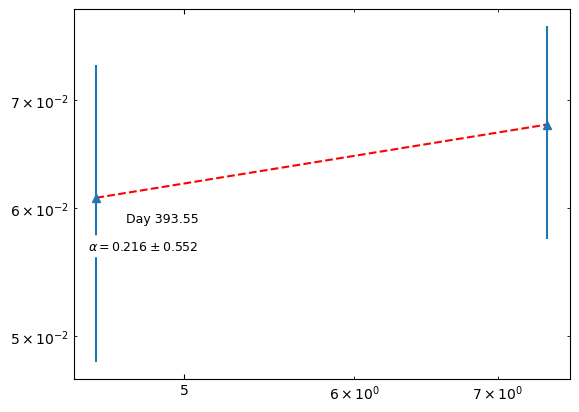

In [161]:

#plotting to check
fig,ax = plt.subplots()
mask = df27['Flux Density (mJy)'] > 3 * df27['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df27['Freq (GHz)'][mask], df27['Flux Density (mJy)'][mask], yerr=df27['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 393.55', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df27['Freq (GHz)'][mask], fit_model_weights27(df27['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.216 \\pm 0.552}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Now for it all together

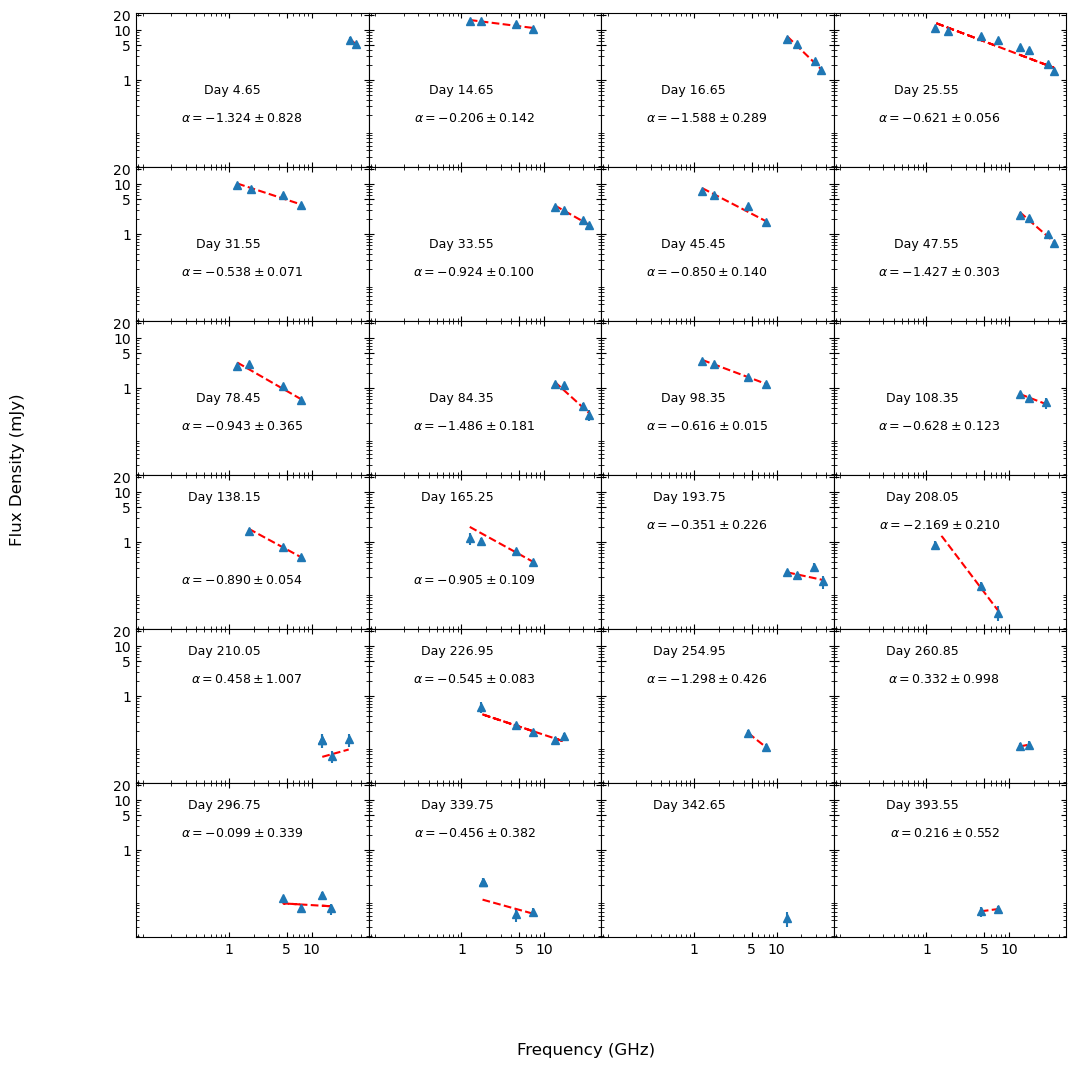

In [175]:
fig, ax = plt.subplots(6, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)


# row 1
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,0].errorbar(df1['Freq (GHz)'][mask], df1['Flux Density (mJy)'][mask], yerr=yerr1, fmt='^')
    ax[0,0].set_xscale('log')
    ax[0,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,0].annotate('Day 4.65', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,0].plot(df1['Freq (GHz)'][mask], fit_model_weights1(df1['Freq (GHz)'][mask]), 'r--')
    ax[0,0].annotate('${\u03B1 = -1.324 \\pm 0.828}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,1].errorbar(df2['Freq (GHz)'][mask], df2['Flux Density (mJy)'][mask], yerr=yerr2, fmt='^')
    ax[0,1].set_xscale('log')
    ax[0,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,1].set_yscale('log')
    ax[0,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,1].annotate('Day 14.65', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,1].plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax[0,1].annotate('${\u03B1 = -0.206 \\pm 0.142}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,2].errorbar(df3['Freq (GHz)'][mask], df3['Flux Density (mJy)'][mask], yerr=yerr3, fmt='^')
    ax[0,2].set_xscale('log')
    ax[0,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,2].set_yscale('log')
    ax[0,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,2].annotate('Day 16.65', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,2].plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax[0,2].annotate('${\u03B1 = -1.588 \\pm 0.289}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,3].errorbar(df4['Freq (GHz)'][mask], df4['Flux Density (mJy)'][mask], yerr=yerr4, fmt='^')
    ax[0,3].set_xscale('log')
    ax[0,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,3].set_yscale('log')
    ax[0,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,3].annotate('Day 25.55', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,3].plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax[0,3].annotate('${\u03B1 = -0.621 \\pm 0.056}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

# row 2
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,0].errorbar(df6['Freq (GHz)'][mask], df6['Flux Density (mJy)'][mask], yerr=yerr6, fmt='^')
    ax[1,0].set_xscale('log')
    ax[1,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,0].set_yscale('log')
    ax[1,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,0].annotate('Day 31.55', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,0].plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax[1,0].annotate('${\u03B1 = -0.538 \\pm 0.071}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,1].errorbar(df7['Freq (GHz)'][mask], df7['Flux Density (mJy)'][mask], yerr=yerr7, fmt='^')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,1].set_yscale('log')
    ax[1,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,1].annotate('Day 33.55', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,1].plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax[1,1].annotate('${\u03B1 = -0.924 \\pm 0.100}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,2].errorbar(df8['Freq (GHz)'][mask], df8['Flux Density (mJy)'][mask], yerr=yerr8, fmt='^')
    ax[1,2].set_xscale('log')
    ax[1,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,2].set_yscale('log')
    ax[1,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,2].annotate('Day 45.45', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,2].plot(df8['Freq (GHz)'][mask], fit_model_weights8(df8['Freq (GHz)'][mask]), 'r--')
    ax[1,2].annotate('${\u03B1 = -0.850 \\pm 0.140}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,3].errorbar(df9['Freq (GHz)'][mask], df9['Flux Density (mJy)'][mask], yerr=yerr9, fmt='^')
    ax[1,3].set_xscale('log')
    ax[1,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,3].set_yscale('log')
    ax[1,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,3].annotate('Day 47.55', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,3].plot(df9['Freq (GHz)'][mask], fit_model_weights9(df9['Freq (GHz)'][mask]), 'r--')
    ax[1,3].annotate('${\u03B1 = -1.427 \\pm 0.303}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

# row 3
mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,0].errorbar(df10['Freq (GHz)'][mask], df10['Flux Density (mJy)'][mask], yerr=yerr10, fmt='^')
    ax[2,0].set_xscale('log')
    ax[2,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,0].set_yscale('log')
    ax[2,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,0].annotate('Day 78.45', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,0].plot(df10['Freq (GHz)'][mask], fit_model_weights10(df10['Freq (GHz)'][mask]), 'r--')
    ax[2,0].annotate('${\u03B1 = -0.943 \\pm 0.365}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,1].errorbar(df11['Freq (GHz)'][mask], df11['Flux Density (mJy)'][mask], yerr=yerr11, fmt='^')
    ax[2,1].set_xscale('log')
    ax[2,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,1].set_yscale('log')
    ax[2,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,1].annotate('Day 84.35', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,1].plot(df11['Freq (GHz)'][mask], fit_model_weights11(df11['Freq (GHz)'][mask]), 'r--')
    ax[2,1].annotate('${\u03B1 = -1.486 \\pm 0.181}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,2].errorbar(df12['Freq (GHz)'][mask], df12['Flux Density (mJy)'][mask], yerr=yerr12, fmt='^')
    ax[2,2].set_xscale('log')
    ax[2,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,2].set_yscale('log')
    ax[2,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,2].annotate('Day 98.35', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,2].plot(df12['Freq (GHz)'][mask], fit_model_weights12(df12['Freq (GHz)'][mask]), 'r--')
    ax[2,2].annotate('${\u03B1 = -0.616 \\pm 0.015}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,3].errorbar(df13['Freq (GHz)'][mask], df13['Flux Density (mJy)'][mask], yerr=yerr13, fmt='^')
    ax[2,3].set_xscale('log')
    ax[2,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,3].set_yscale('log')
    ax[2,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,3].annotate('Day 108.35', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,3].plot(df13['Freq (GHz)'][mask], fit_model_weights13(df13['Freq (GHz)'][mask]), 'r--')
    ax[2,3].annotate('${\u03B1 = -0.628 \\pm 0.123}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

# row4
mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,0].errorbar(df14['Freq (GHz)'][mask], df14['Flux Density (mJy)'][mask], yerr=yerr14, fmt='^')
    ax[3,0].set_xscale('log')
    ax[3,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,0].set_yscale('log')
    ax[3,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,0].annotate('Day 138.15', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,0].plot(df14['Freq (GHz)'][mask], fit_model_weights14(df14['Freq (GHz)'][mask]), 'r--')
    ax[3,0].annotate('${\u03B1 = -0.890 \\pm 0.054}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df15['Flux Density (mJy)'] > 3 * df15['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,1].errorbar(df15['Freq (GHz)'][mask], df15['Flux Density (mJy)'][mask], yerr=yerr15, fmt='^')
    ax[3,1].set_xscale('log')
    ax[3,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,1].set_yscale('log')
    ax[3,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,1].annotate('Day 165.25', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,1].plot(df15['Freq (GHz)'][mask], fit_model_weights15(df15['Freq (GHz)'][mask]), 'r--')
    ax[3,1].annotate('${\u03B1 = -0.905 \\pm 0.109}$', xy=(120, 40), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df16['Flux Density (mJy)'] > 3 * df16['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,2].errorbar(df16['Freq (GHz)'][mask], df16['Flux Density (mJy)'][mask], yerr=yerr16, fmt='^')
    ax[3,2].set_xscale('log')
    ax[3,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,2].set_yscale('log')
    ax[3,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,2].annotate('Day 193.75', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,2].plot(df16['Freq (GHz)'][mask], fit_model_weights16(df16['Freq (GHz)'][mask]), 'r--')
    ax[3,2].annotate('${\u03B1 = -0.351 \\pm 0.226}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df17['Flux Density (mJy)'] > 3 * df17['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,3].errorbar(df17['Freq (GHz)'][mask], df17['Flux Density (mJy)'][mask], yerr=yerr17, fmt='^')
    ax[3,3].set_xscale('log')
    ax[3,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,3].set_yscale('log')
    ax[3,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,3].annotate('Day 208.05', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,3].plot(df17['Freq (GHz)'][mask], fit_model_weights17(df17['Freq (GHz)'][mask]), 'r--')
    ax[3,3].annotate('${\u03B1 = -2.169 \\pm 0.210}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

# row 5
mask = df18['Flux Density (mJy)'] > 3 * df18['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,0].errorbar(df18['Freq (GHz)'][mask], df18['Flux Density (mJy)'][mask], yerr=yerr18, fmt='^')
    ax[4,0].set_xscale('log')
    ax[4,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,0].set_yscale('log')
    ax[4,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,0].annotate('Day 210.05', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,0].plot(df18['Freq (GHz)'][mask], fit_model_weights18(df18['Freq (GHz)'][mask]), 'r--')
    ax[4,0].annotate('${\u03B1 = 0.458 \\pm 1.007}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df19['Flux Density (mJy)'] > 3 * df19['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,1].errorbar(df19['Freq (GHz)'][mask], df19['Flux Density (mJy)'][mask], yerr=yerr19, fmt='^')
    ax[4,1].set_xscale('log')
    ax[4,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,1].set_yscale('log')
    ax[4,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,1].annotate('Day 226.95', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,1].plot(df19['Freq (GHz)'][mask], fit_model_weights19(df19['Freq (GHz)'][mask]), 'r--')
    ax[4,1].annotate('${\u03B1 = -0.545 \\pm 0.083}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df21['Flux Density (mJy)'] > 3 * df21['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,2].errorbar(df21['Freq (GHz)'][mask], df21['Flux Density (mJy)'][mask], yerr=yerr21, fmt='^')
    ax[4,2].set_xscale('log')
    ax[4,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,2].set_yscale('log')
    ax[4,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,2].annotate('Day 254.95', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,2].plot(df21['Freq (GHz)'][mask], fit_model_weights21(df21['Freq (GHz)'][mask]), 'r--')
    ax[4,2].annotate('${\u03B1 = -1.298 \\pm 0.426}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df22['Flux Density (mJy)'] > 3 * df22['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,3].errorbar(df22['Freq (GHz)'][mask], df22['Flux Density (mJy)'][mask], yerr=yerr22, fmt='^')
    ax[4,3].set_xscale('log')
    ax[4,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,3].set_yscale('log')
    ax[4,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,3].annotate('Day 260.85', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,3].plot(df22['Freq (GHz)'][mask], fit_model_weights22(df22['Freq (GHz)'][mask]), 'r--')
    ax[4,3].annotate('${\u03B1 = 0.332 \\pm 0.998}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

# row 6
mask = df23['Flux Density (mJy)'] > 3 * df23['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,0].errorbar(df23['Freq (GHz)'][mask], df23['Flux Density (mJy)'][mask], yerr=yerr23, fmt='^')
    ax[5,0].set_xscale('log')
    ax[5,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[5,0].set_yscale('log')
    ax[5,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[5,0].annotate('Day 296.75', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[5,0].plot(df23['Freq (GHz)'][mask], fit_model_weights23(df23['Freq (GHz)'][mask]), 'r--')
    ax[5,0].annotate('${\u03B1 = -0.099 \\pm 0.339}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df25['Flux Density (mJy)'] > 3 * df25['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,1].errorbar(df25['Freq (GHz)'][mask], df25['Flux Density (mJy)'][mask], yerr=yerr25, fmt='^')
    ax[5,1].set_xscale('log')
    ax[5,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[5,1].set_yscale('log')
    ax[5,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[5,1].annotate('Day 339.75', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[5,1].plot(df25['Freq (GHz)'][mask], fit_model_weights25(df25['Freq (GHz)'][mask]), 'r--')
    ax[5,1].annotate('${\u03B1 = -0.456 \\pm 0.382}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df26['Flux Density (mJy)'] > 3 * df26['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,2].errorbar(df26['Freq (GHz)'][mask], df26['Flux Density (mJy)'][mask], yerr=yerr26, fmt='^')
    ax[5,2].set_xscale('log')
    ax[5,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[5,2].set_yscale('log')
    ax[5,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[5,2].annotate('Day 342.65', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)

mask = df27['Flux Density (mJy)'] > 3 * df27['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,3].errorbar(df27['Freq (GHz)'][mask], df27['Flux Density (mJy)'][mask], yerr=yerr27, fmt='^')
    ax[5,3].set_xscale('log')
    ax[5,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[5,3].set_yscale('log')
    ax[5,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[5,3].annotate('Day 393.55', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[5,3].plot(df27['Freq (GHz)'][mask], fit_model_weights27(df27['Freq (GHz)'][mask]), 'r--')
    ax[5,3].annotate('${\u03B1 = 0.216 \\pm 0.552}$', xy=(120, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();